In [1]:
import pandas as pd
fake_news=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Fake_News.xlsx')

In [2]:
real_news=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Real_News.xlsx')

In [3]:
fake_news['Label']= 0

In [4]:
real_news['Label']=1

In [5]:
data=pd.concat([real_news, fake_news])

In [6]:
print(real_news.shape)
print(fake_news.shape)
print(data.shape)

(21755, 4)
(23697, 4)
(45452, 4)


In [7]:
fake_news['News_text'][0]

'Senate Minority Leader Harry Reid has it out for Republican nominee Donald Trump.On Thursday on the Senate floor, Senator Reid (D-Nev.) unleashed a rant against the business mogul with a bitterness that makes you wonder just how long he had been holding it in. Reid is approaching retirement as January draws near, and it s clear that the Democratic leader wants America to understand just how important it is to make sure that the country isn t left in Trump s little, orange, greedy hands.Making reference to a Newsweek article that questions the Trump Organization s international business ties and suggests that a President Trump could be disastrous for national security, Reid called Trump  a spoiled brat  and  a notorious con artist  whose questionable, scammy business practices would only spill over into his administration if he becomes President. Reid said: Let s be clear about Donald Trump. He s a spoiled brat, raised in plenty, who inherited a fortune, used his money to make more mon

In [8]:
data.head()

Title  ... Label
0  Trump judicial nominee withdraws from consider...  ...     1
1  No. 2 Democrat in Senate calls on Franken to r...  ...     1
2  WTO chief won't debate Trump, but rallies supp...  ...     1
3  Hungary says it is facing 'frontal assault' fr...  ...     1
4  Senate Republicans shove tax bill ahead as Dem...  ...     1

[5 rows x 4 columns]

In [9]:
data.describe(include='all')

Title  ...         Label
count                                               45452  ...  45452.000000
unique                                              39172  ...           NaN
top     Factbox: Trump fills top jobs for his administ...  ...           NaN
freq                                                   14  ...           NaN
mean                                                  NaN  ...      0.478637
std                                                   NaN  ...      0.499549
min                                                   NaN  ...      0.000000
25%                                                   NaN  ...      0.000000
50%                                                   NaN  ...      0.000000
75%                                                   NaN  ...      1.000000
max                                                   NaN  ...      1.000000

[11 rows x 4 columns]

In [10]:
data.nunique()

Title        39172
News_text    39085
Subject          9
Label            2
dtype: int64

In [11]:
print(data.shape)
data=data.drop_duplicates(subset=['News_text'])
print(data.shape)

(45452, 4)
(39085, 4)


In [12]:
data.isna().sum()

Title        0
News_text    0
Subject      0
Label        0
dtype: int64

In [13]:
message=data.copy()

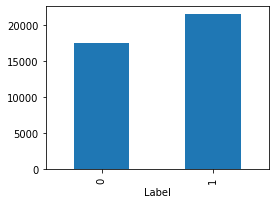

In [14]:
%matplotlib inline
GroupedData=message.groupby('Label').size()
GroupedData.plot(kind='bar', figsize=(4,3))

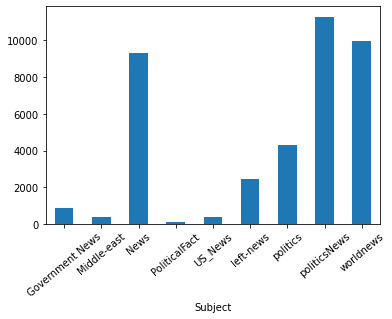

In [15]:
import matplotlib.pyplot as plt
groupeddata=message.groupby('Subject').size()
groupeddata.plot( kind='bar',rot=40)

In [16]:
message.reset_index(inplace=True)

In [17]:
message = message.drop(columns='index',axis=1)

In [18]:
message['ID']=range(0,len(message))


In [ ]:
message

Title  ...     ID
0      Trump judicial nominee withdraws from consider...  ...      0
1      No. 2 Democrat in Senate calls on Franken to r...  ...      1
2      WTO chief won't debate Trump, but rallies supp...  ...      2
3      Hungary says it is facing 'frontal assault' fr...  ...      3
4      Senate Republicans shove tax bill ahead as Dem...  ...      4
...                                                  ...  ...    ...
39080   WATCH: Rachel Maddow Has PERFECT Argument To ...  ...  39080
39081  IRONIC: WHITE SOUTHERNER BILL CLINTON Just Tol...  ...  39081
39082   WATCH: Tony Awards Gives Hateful Bigots The M...  ...  39082
39083   Bill Maher Gets His Swagger On Over Liberal C...  ...  39083
39084  State Dept. Releases 7,000 Clinton E-mails But...  ...  39084

[39085 rows x 5 columns]

In [19]:
news=message[message['Label']==1]['News_text'].values
news_string=str(news)
print(news_string)

['WASHINGTON (Reuters) - A lawyer nominated by President Donald Trump to serve as a federal judge withdrew from consideration on Monday after video of his Senate confirmation hearing showing him unable to provide answers to rudimentary legal questions went viral last week. Trump accepted Matthew Petersenâ€™s offer to withdraw his nomination as a district court judge in Washington, a White House official said. Petersen, a Republican member of the Federal Election Commission, became the latest of Trumpâ€™s judicial nominations to fail as the president seeks to win confirmation of judges who will make the federal judiciary more conservative. â€œJust because youâ€™ve seen â€˜My Cousin Vinnyâ€™ doesnâ€™t qualify you to be a federal judge,â€\x9d Republican Senator John Kennedy, who grilled Petersen during his Dec. 13 confirmation hearing, told WWL-TV, referring to the 1992 comedy film about a novice lawyer. Kennedy, who has been critical of some of Trumpâ€™s judicial nominees, asked several 

In [ ]:
SelectedColumns=['Title', 'News_text', 'Subject']

# Selecting final columns
DataForML=message[SelectedColumns]
DataForML.head()

Title  ...       Subject
0  Trump judicial nominee withdraws from consider...  ...  politicsNews
1  No. 2 Democrat in Senate calls on Franken to r...  ...  politicsNews
2  WTO chief won't debate Trump, but rallies supp...  ...  politicsNews
3  Hungary says it is facing 'frontal assault' fr...  ...     worldnews
4  Senate Republicans shove tax bill ahead as Dem...  ...  politicsNews

[5 rows x 3 columns]

In [ ]:
# Import pickle Package

import pickle

# Save the Modle to file in the current working directory

Pkl_Filename = "/content/drive/MyDrive/Colab Notebooks/Pickle_unfilter_data.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(DataForML, file)
    file.close()

In [ ]:
import pickle
# Load the Model back from file
# Pkl_Filename='/content/Pickle_RL_Model.pkl'
# Drive location
Pkl_Filename = "/content/drive/MyDrive/Colab Notebooks/Pickle_unfilter_data.pkl"

with open(Pkl_Filename, 'rb') as file:  
    Pickled_unfilter_data = pickle.load(file)
    file.close()
Pickled_unfilter_data

Title  ...       Subject
0      Trump judicial nominee withdraws from consider...  ...  politicsNews
1      No. 2 Democrat in Senate calls on Franken to r...  ...  politicsNews
2      WTO chief won't debate Trump, but rallies supp...  ...  politicsNews
3      Hungary says it is facing 'frontal assault' fr...  ...     worldnews
4      Senate Republicans shove tax bill ahead as Dem...  ...  politicsNews
...                                                  ...  ...           ...
23687   WATCH: Rachel Maddow Has PERFECT Argument To ...  ...          News
23689  IRONIC: WHITE SOUTHERNER BILL CLINTON Just Tol...  ...      politics
23691   WATCH: Tony Awards Gives Hateful Bigots The M...  ...          News
23693   Bill Maher Gets His Swagger On Over Liberal C...  ...          News
23695  State Dept. Releases 7,000 Clinton E-mails But...  ...      politics

[39085 rows x 3 columns]

## Wordcloud on real data(Label=1)

In [ ]:
news=message[message['Label']==1]['News_text'].values
news_string=str(news)
print(news_string)

['WASHINGTON (Reuters) - A lawyer nominated by President Donald Trump to serve as a federal judge withdrew from consideration on Monday after video of his Senate confirmation hearing showing him unable to provide answers to rudimentary legal questions went viral last week. Trump accepted Matthew Petersenâ€™s offer to withdraw his nomination as a district court judge in Washington, a White House official said. Petersen, a Republican member of the Federal Election Commission, became the latest of Trumpâ€™s judicial nominations to fail as the president seeks to win confirmation of judges who will make the federal judiciary more conservative. â€œJust because youâ€™ve seen â€˜My Cousin Vinnyâ€™ doesnâ€™t qualify you to be a federal judge,â€\x9d Republican Senator John Kennedy, who grilled Petersen during his Dec. 13 confirmation hearing, told WWL-TV, referring to the 1992 comedy film about a novice lawyer. Kennedy, who has been critical of some of Trumpâ€™s judicial nominees, asked several 

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
nltk.download('brown')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [ ]:
import re
from nltk.corpus import stopwords

news_string2=re.sub(r"\([^()]*\)",r" ",news_string)
news_string2=re.sub(r'[^a-z A-Z]',r' ',news_string2)
news_string2=news_string2.lower()
news_string2=re.sub(r'\b\w{1,3}\b',r' ',news_string2)
news_string2=re.sub(r' +', r' ',news_string2)
news_string2 = [word for word in news_string2.split(" ") if not word in stopwords.words('english')]
worcloud_string=" ".join(news_string2)
print(worcloud_string)

 washington lawyer nominated president donald trump serve federal judge withdrew consideration monday video senate confirmation hearing showing unable provide answers rudimentary legal questions went viral last week trump accepted matthew petersen offer withdraw nomination district court judge washington white house official said petersen republican member federal election commission became latest trump judicial nominations fail president seeks confirmation judges make federal judiciary conservative seen cousin vinny qualify federal judge republican senator john kennedy grilled petersen confirmation hearing told referring comedy film novice lawyer kennedy critical trump judicial nominees asked several basic legal questions petersen could answer video shown cable news shows widely viewed internet honored nominated position become clear past days nomination become distraction fair administration petersen wrote withdrawal letter trump hoped nearly decades public service might carry weight

In [ ]:
listofArticles=[l for l in worcloud_string.split(" ")]

In [ ]:
listofArticles.remove('')

In [ ]:
listofArticles

['washington',
 'lawyer',
 'nominated',
 'president',
 'donald',
 'trump',
 'serve',
 'federal',
 'judge',
 'withdrew',
 'consideration',
 'monday',
 'video',
 'senate',
 'confirmation',
 'hearing',
 'showing',
 'unable',
 'provide',
 'answers',
 'rudimentary',
 'legal',
 'questions',
 'went',
 'viral',
 'last',
 'week',
 'trump',
 'accepted',
 'matthew',
 'petersen',
 'offer',
 'withdraw',
 'nomination',
 'district',
 'court',
 'judge',
 'washington',
 'white',
 'house',
 'official',
 'said',
 'petersen',
 'republican',
 'member',
 'federal',
 'election',
 'commission',
 'became',
 'latest',
 'trump',
 'judicial',
 'nominations',
 'fail',
 'president',
 'seeks',
 'confirmation',
 'judges',
 'make',
 'federal',
 'judiciary',
 'conservative',
 'seen',
 'cousin',
 'vinny',
 'qualify',
 'federal',
 'judge',
 'republican',
 'senator',
 'john',
 'kennedy',
 'grilled',
 'petersen',
 'confirmation',
 'hearing',
 'told',
 'referring',
 'comedy',
 'film',
 'novice',
 'lawyer',
 'kennedy',
 'cri

In [ ]:
pip install autocorrect

In [ ]:
def length(list):
    count = 0
    for element in list:
        count += 1
    return count

from autocorrect import Speller
spell = Speller()
mispelledWords=[]
countmispelledwords=0
for art in range(length(listofArticles)):
    if listofArticles[art]!=spell(listofArticles[art]):
        mispelledWords.append(listofArticles[art])
        countmispelledwords+=1

In [ ]:
# mispelledWords
countmispelledwords

65

In [ ]:
# Finding out the frequency of words in text
import pandas as pd

# Creating a Dataframe
def word_dis(data):
  news_string3=[]
  custom_stopwords=['hariri']
  for value in data:
    if not value in custom_stopwords:
      news_string3.append(value)
  return news_string3
WordData=pd.DataFrame(data= pd.Series(word_dis(mispelledWords)), columns=['Misspelled Words'])   
# Finding the top frequency words
WordData.groupby('Misspelled Words').size().nlargest(20)

Misspelled Words
petersen        7
caruana         4
galizia         4
durbin          3
franken         3
muscat          3
aoun            2
beirut          2
cfpb            2
mateer          2
talley          2
bassil          1
complainants    1
cordray         1
daphne          1
extricate       1
gebran          1
grassley        1
islamist        1
klan            1
dtype: int64

In [ ]:
Correctwords=[]
countcorrectedwords=0
for i,num in zip(listofArticles,range(length(listofArticles))):
  if listofArticles[num] not in mispelledWords:
    Correctwords.append(i)
    countcorrectedwords+=1

In [ ]:
Correctwords
# countcorrectedwords

['washington',
 'lawyer',
 'nominated',
 'president',
 'donald',
 'trump',
 'serve',
 'federal',
 'judge',
 'withdrew',
 'consideration',
 'monday',
 'video',
 'senate',
 'confirmation',
 'hearing',
 'showing',
 'unable',
 'provide',
 'answers',
 'rudimentary',
 'legal',
 'questions',
 'went',
 'viral',
 'last',
 'week',
 'trump',
 'accepted',
 'matthew',
 'offer',
 'withdraw',
 'nomination',
 'district',
 'court',
 'judge',
 'washington',
 'white',
 'house',
 'official',
 'said',
 'republican',
 'member',
 'federal',
 'election',
 'commission',
 'became',
 'latest',
 'trump',
 'judicial',
 'nominations',
 'fail',
 'president',
 'seeks',
 'confirmation',
 'judges',
 'make',
 'federal',
 'judiciary',
 'conservative',
 'seen',
 'cousin',
 'qualify',
 'federal',
 'judge',
 'republican',
 'senator',
 'john',
 'kennedy',
 'grilled',
 'confirmation',
 'hearing',
 'told',
 'referring',
 'comedy',
 'film',
 'novice',
 'lawyer',
 'kennedy',
 'critical',
 'trump',
 'judicial',
 'nominees',
 'ask

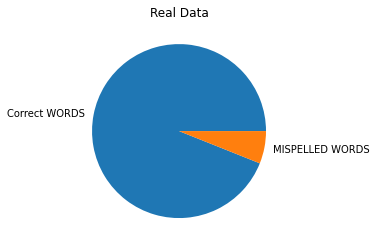

In [ ]:
# Python matplotlib Pie Chart Examples

from matplotlib import pyplot as plt

x = [countcorrectedwords,countmispelledwords]
y = ['Correct WORDS','MISPELLED WORDS']

plt.pie(x, labels = y)
plt.title('Real Data')
plt.show()

In [ ]:
from autocorrect import Speller
spell = Speller()
CorrectedArticle=spell(worcloud_string)
CorrectedArticlelist=CorrectedArticle.split(" ")

In [ ]:
CorrectedArticlelist

['',
 'washington',
 'lawyer',
 'nominated',
 'president',
 'donald',
 'trump',
 'serve',
 'federal',
 'judge',
 'withdrew',
 'consideration',
 'monday',
 'video',
 'senate',
 'confirmation',
 'hearing',
 'showing',
 'unable',
 'provide',
 'answers',
 'rudimentary',
 'legal',
 'questions',
 'went',
 'viral',
 'last',
 'week',
 'trump',
 'accepted',
 'matthew',
 'peterson',
 'offer',
 'withdraw',
 'nomination',
 'district',
 'court',
 'judge',
 'washington',
 'white',
 'house',
 'official',
 'said',
 'peterson',
 'republican',
 'member',
 'federal',
 'election',
 'commission',
 'became',
 'latest',
 'trump',
 'judicial',
 'nominations',
 'fail',
 'president',
 'seeks',
 'confirmation',
 'judges',
 'make',
 'federal',
 'judiciary',
 'conservative',
 'seen',
 'cousin',
 'inns',
 'qualify',
 'federal',
 'judge',
 'republican',
 'senator',
 'john',
 'kennedy',
 'grilled',
 'peterson',
 'confirmation',
 'hearing',
 'told',
 'referring',
 'comedy',
 'film',
 'novice',
 'lawyer',
 'kennedy',
 

In [ ]:

from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()
lem=[]
for i in CorrectedArticlelist:
  lem.append(lemmatizer.lemmatize(i))

In [ ]:
lem=" ".join(lem)

In [ ]:
lem

' washington lawyer nominated president donald trump serve federal judge withdrew consideration monday video senate confirmation hearing showing unable provide answer rudimentary legal question went viral last week trump accepted matthew peterson offer withdraw nomination district court judge washington white house official said peterson republican member federal election commission became latest trump judicial nomination fail president seek confirmation judge make federal judiciary conservative seen cousin inn qualify federal judge republican senator john kennedy grilled peterson confirmation hearing told referring comedy film novice lawyer kennedy critical trump judicial nominee asked several basic legal question peterson could answer video shown cable news show widely viewed internet honored nominated position become clear past day nomination become distraction fair administration peterson wrote withdrawal letter trump hoped nearly decade public service might carry weight worst minu

In [ ]:
news_string2=CorrectedArticle.split(" ")

In [ ]:
# Finding out the frequency of words in text
import pandas as pd

# Creating a Dataframe
news_string3=[]
custom_stopwords=['said','would']
for value in news_string2:
  if not value in custom_stopwords:
    news_string3.append(value)

WordData=pd.DataFrame(data= pd.Series(news_string3), columns=['words'])   
# Finding the top frequency words
WordData.groupby('words').size().nlargest(10)

words
rule         12
trump        12
hair         11
trade        10
lebanon       9
peterson      7
president     7
wednesday     7
federal       6
noreika       6
dtype: int64

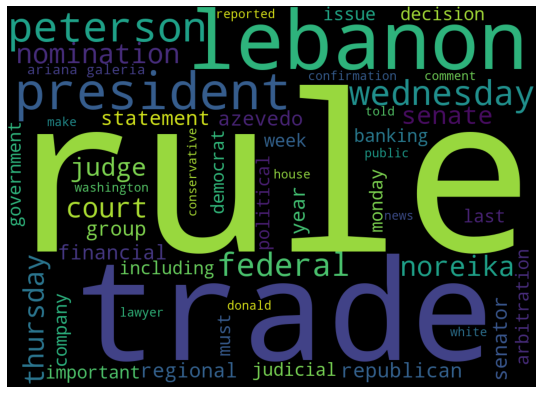

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt


from wordcloud import WordCloud, STOPWORDS

# Creating a custom list of stopwords
customStopwords=list(STOPWORDS) + ['trump','said','would','hair',]

wordcloudimage = WordCloud( max_words=50,
                            font_step=2 ,
                            max_font_size=500,
                            stopwords=customStopwords,
                            width=1000,
                            height=720
                          ).generate(lem)

plt.figure(figsize=(15,7))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()

## Wordcloud on fake data(Label=0)

In [ ]:
news_fake=message[message['Label']==0]['News_text'].values
news_string_fake=str(news_fake)
print(news_string_fake)

['Senate Minority Leader Harry Reid has it out for Republican nominee Donald Trump.On Thursday on the Senate floor, Senator Reid (D-Nev.) unleashed a rant against the business mogul with a bitterness that makes you wonder just how long he had been holding it in. Reid is approaching retirement as January draws near, and it s clear that the Democratic leader wants America to understand just how important it is to make sure that the country isn t left in Trump s little, orange, greedy hands.Making reference to a Newsweek article that questions the Trump Organization s international business ties and suggests that a President Trump could be disastrous for national security, Reid called Trump  a spoiled brat  and  a notorious con artist  whose questionable, scammy business practices would only spill over into his administration if he becomes President. Reid said: Let s be clear about Donald Trump. He s a spoiled brat, raised in plenty, who inherited a fortune, used his money to make more mo

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
nltk.download('brown')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [ ]:
import re
from nltk.corpus import stopwords

news_string_fake2=re.sub(r"\([^()]*\)",r" ",news_string_fake)
news_string_fake2=re.sub(r'[^a-z A-Z]',r' ',news_string_fake2)
news_string_fake2=news_string_fake2.lower()
news_string_fake2=re.sub(r'\b\w{1,3}\b',r' ',news_string_fake2)
news_string_fake2=re.sub(r' +', r' ',news_string_fake2)
news_string_fake2 = [word for word in news_string_fake2.split(" ") if not word in stopwords.words('english')]
worcloud_string_fake=" ".join(news_string_fake2)
print(worcloud_string_fake)

 senate minority leader harry reid republican nominee donald trump thursday senate floor senator reid unleashed rant business mogul bitterness makes wonder long holding reid approaching retirement january draws near clear democratic leader wants america understand important make sure country left trump little orange greedy hands making reference newsweek article questions trump organization international business ties suggests president trump could disastrous national security reid called trump spoiled brat notorious artist whose questionable scammy business practices would spill administration becomes president reid said clear donald trump spoiled brat raised plenty inherited fortune used money make money swindling working women would change president answer simple trump change asking rich scamming america donald trump trying help person donald trump given opportunity donald trump turn america scam like trump university reid also raised eyebrows calling trump human leech trump human l

In [ ]:
listofArticles2=[l for l in worcloud_string_fake.split(" ")]

In [ ]:
listofArticles2

['',
 'senate',
 'minority',
 'leader',
 'harry',
 'reid',
 'republican',
 'nominee',
 'donald',
 'trump',
 'thursday',
 'senate',
 'floor',
 'senator',
 'reid',
 'unleashed',
 'rant',
 'business',
 'mogul',
 'bitterness',
 'makes',
 'wonder',
 'long',
 'holding',
 'reid',
 'approaching',
 'retirement',
 'january',
 'draws',
 'near',
 'clear',
 'democratic',
 'leader',
 'wants',
 'america',
 'understand',
 'important',
 'make',
 'sure',
 'country',
 'left',
 'trump',
 'little',
 'orange',
 'greedy',
 'hands',
 'making',
 'reference',
 'newsweek',
 'article',
 'questions',
 'trump',
 'organization',
 'international',
 'business',
 'ties',
 'suggests',
 'president',
 'trump',
 'could',
 'disastrous',
 'national',
 'security',
 'reid',
 'called',
 'trump',
 'spoiled',
 'brat',
 'notorious',
 'artist',
 'whose',
 'questionable',
 'scammy',
 'business',
 'practices',
 'would',
 'spill',
 'administration',
 'becomes',
 'president',
 'reid',
 'said',
 'clear',
 'donald',
 'trump',
 'spoiled',

In [ ]:
pip install autocorrect

In [ ]:
from autocorrect import Speller
spell = Speller()
mispelledWords_fakedata=[]
countmispelledwords_fakedata=0
for art,num in zip(listofArticles2,range(length(listofArticles2))):
    if listofArticles2[num]!=spell(listofArticles2[num]):
        mispelledWords_fakedata.append(art)
        countmispelledwords_fakedata+=1

In [ ]:
# mispelledWords_fakedata
countmispelledwords_fakedata

40

In [ ]:
# Finding out the frequency of words in text
import pandas as pd

# Creating a Dataframe
def word_dis(data):
  news_string3=[]
  custom_stopwords=[]
  for value in data:
    if not value in custom_stopwords:
      news_string3.append(value)
  return news_string3
WordData=pd.DataFrame(data= pd.Series(word_dis(mispelledWords_fakedata)), columns=['Misspelled Words'])   
# Finding the top frequency words
WordData.groupby('Misspelled Words').size().nlargest(20)

Misspelled Words
corden         6
getty          2
leech          2
benghazi       1
bigoted        1
bigots         1
birther        1
bitches        1
brags          1
catapulted     1
champaign      1
comit          1
competently    1
corks          1
cultists       1
deliciously    1
disses         1
factoid        1
hannity        1
lunatics       1
dtype: int64

In [ ]:
Correctwords_fakedata=[]
countcorrectedwords_fakedata=0
for i,num in zip(listofArticles2,range(length(listofArticles2))):
  if listofArticles2[num] not in mispelledWords_fakedata:
    Correctwords_fakedata.append(i)
    countcorrectedwords_fakedata+=1


In [ ]:
# Correctwords_fakedata
countcorrectedwords_fakedata

1127

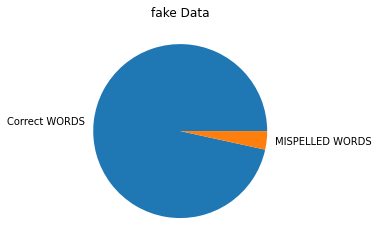

In [ ]:
# Python matplotlib Pie Chart Examples

from matplotlib import pyplot as plt

x = [countcorrectedwords_fakedata,countmispelledwords_fakedata]
y = ['Correct WORDS','MISPELLED WORDS']

plt.pie(x, labels = y)
plt.title('fake Data')
plt.show()

In [ ]:
from autocorrect import Speller
spell = Speller()
CorrectedArticle_fakedata=spell(worcloud_string_fake)
CorrectedArticle_fakedatalist=CorrectedArticle_fakedata.split(" ")

In [ ]:
CorrectedArticle_fakedata

' senate minority leader harry reid republican nominee donald trump thursday senate floor senator reid unleashed rant business mogul bitterness makes wonder long holding reid approaching retirement january draws near clear democratic leader wants america understand important make sure country left trump little orange greedy hands making reference newsweek article questions trump organization international business ties suggests president trump could disastrous national security reid called trump spoiled brat notorious artist whose questionable spammy business practices would spill administration becomes president reid said clear donald trump spoiled brat raised plenty inherited fortune used money make money dwindling working women would change president answer simple trump change asking rich spamming america donald trump trying help person donald trump given opportunity donald trump turn america scam like trump university reid also raised eyebrows calling trump human beech trump human 

In [ ]:

from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()
lem_fakedata=[]
for i in CorrectedArticle_fakedatalist:
  lem_fakedata.append(lemmatizer.lemmatize(i))

In [ ]:
lem_fakedata

['',
 'senate',
 'minority',
 'leader',
 'harry',
 'reid',
 'republican',
 'nominee',
 'donald',
 'trump',
 'thursday',
 'senate',
 'floor',
 'senator',
 'reid',
 'unleashed',
 'rant',
 'business',
 'mogul',
 'bitterness',
 'make',
 'wonder',
 'long',
 'holding',
 'reid',
 'approaching',
 'retirement',
 'january',
 'draw',
 'near',
 'clear',
 'democratic',
 'leader',
 'want',
 'america',
 'understand',
 'important',
 'make',
 'sure',
 'country',
 'left',
 'trump',
 'little',
 'orange',
 'greedy',
 'hand',
 'making',
 'reference',
 'newsweek',
 'article',
 'question',
 'trump',
 'organization',
 'international',
 'business',
 'tie',
 'suggests',
 'president',
 'trump',
 'could',
 'disastrous',
 'national',
 'security',
 'reid',
 'called',
 'trump',
 'spoiled',
 'brat',
 'notorious',
 'artist',
 'whose',
 'questionable',
 'spammy',
 'business',
 'practice',
 'would',
 'spill',
 'administration',
 'becomes',
 'president',
 'reid',
 'said',
 'clear',
 'donald',
 'trump',
 'spoiled',
 'brat

In [ ]:
lem_fakedata=" ".join(lem_fakedata)

In [ ]:
lem_fakedata

' senate minority leader harry reid republican nominee donald trump thursday senate floor senator reid unleashed rant business mogul bitterness make wonder long holding reid approaching retirement january draw near clear democratic leader want america understand important make sure country left trump little orange greedy hand making reference newsweek article question trump organization international business tie suggests president trump could disastrous national security reid called trump spoiled brat notorious artist whose questionable spammy business practice would spill administration becomes president reid said clear donald trump spoiled brat raised plenty inherited fortune used money make money dwindling working woman would change president answer simple trump change asking rich spamming america donald trump trying help person donald trump given opportunity donald trump turn america scam like trump university reid also raised eyebrow calling trump human beech trump human beech bl

In [ ]:
news_string_fake2=CorrectedArticle_fakedata.split(" ")

In [ ]:
# Finding out the frequency of words in text
import pandas as pd

# Creating a Dataframe
news_string_fake3=[]
custom_stopwords=['said','hariri','would']
for value in news_string_fake2:
  if not value in custom_stopwords:
    news_string_fake3.append(value)

WordData_fake=pd.DataFrame(data= pd.Series(news_string_fake3), columns=['words'])   
# Finding the top frequency words
WordData_fake.groupby('words').size().nlargest(10)

words
trump         38
republican    13
donald        12
percent       11
reid          11
every         10
also           9
bradford       9
like           8
president      8
dtype: int64

In [ ]:
# # New Updated WordData for WORDCLOUD after
# WordData=re.sub(r'\n', r' ',WordData.to_string(index=False))
# Worddata=re.sub(r'[.]', r' ',WordData)
# WordData=re.sub(r' +', r' ',WordData)
# WordData

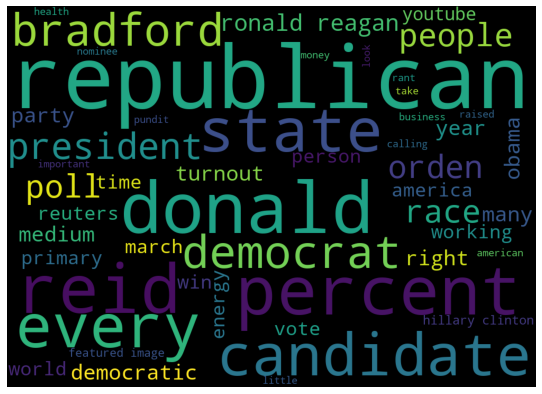

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt


from wordcloud import WordCloud, STOPWORDS

# Creating a custom list of stopwords
customStopwords=list(STOPWORDS) + ['trump','said','would']

wordcloudimage = WordCloud( max_words=50,
                            font_step=2 ,
                            max_font_size=500,
                            stopwords=customStopwords,
                            width=1000,
                            height=720
                          ).generate(lem_fakedata)

plt.figure(figsize=(15,7))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()

## WordCloud of real data on subjectwise

In [ ]:
for i in message['Subject'].unique():
  print(i,' : ', message.loc[(message['Subject']==i) & (message['Label']==1)]['News_text'].count())

politicsNews  :  11295
worldnews  :  9987
News  :  129
PoliticalFact  :  109
left-news  :  0
politics  :  0
Government News  :  0
Middle-east  :  0
US_News  :  0


Subject-> politicsNews

In [ ]:
message['Subject'].unique()

array(['politicsNews', 'worldnews', 'News', 'PoliticalFact', 'left-news',
       'politics', 'Government News', 'Middle-east', 'US_News'],
      dtype=object)

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
nltk.download('brown')

!pip install autocorrect

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


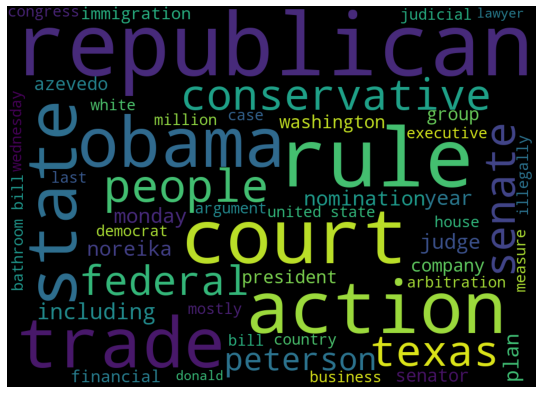

In [ ]:
news=message.loc[(message['Subject']=='politicsNews') & (message['Label']==1)]['News_text'].values
news_string=str(news)

import re
from nltk.corpus import stopwords

news_string2=re.sub(r"\([^()]*\)",r" ",news_string)
news_string2=re.sub(r'[^a-z A-Z]',r' ',news_string2)
news_string2=news_string2.lower()
news_string2=re.sub(r'\b\w{1,3}\b',r' ',news_string2)
news_string2=re.sub(r' +', r' ',news_string2)
news_string2 = [word for word in news_string2.split(" ") if not word in stopwords.words('english')]
worcloud_string=" ".join(news_string2)


from autocorrect import Speller
spell = Speller()
CorrectedArticle=spell(worcloud_string)
CorrectedArticlelist=CorrectedArticle.split(" ")


from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()
lem=[]
for i in CorrectedArticlelist:
  lem.append(lemmatizer.lemmatize(i))
lem=" ".join(lem)

%matplotlib inline
import matplotlib.pyplot as plt


from wordcloud import WordCloud, STOPWORDS

# Creating a custom list of stopwords
customStopwords=list(STOPWORDS)  + ['trump','said']

wordcloudimage = WordCloud( max_words=50,
                            font_step=2 ,
                            max_font_size=500,
                            stopwords=customStopwords,
                            width=1000,
                            height=720
                          ).generate(lem)

plt.figure(figsize=(15,7))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()

Subject -> worldnews

In [ ]:
message['Subject'].unique()

array(['politicsNews', 'worldnews', 'News', 'PoliticalFact', 'left-news',
       'politics', 'Government News', 'Middle-east', 'US_News'],
      dtype=object)

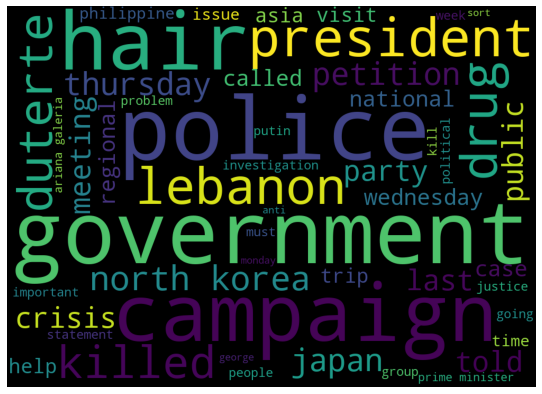

In [ ]:
news=message.loc[(message['Subject']=='worldnews') & (message['Label']==1)]['News_text'].values
news_string=str(news)

import re
from nltk.corpus import stopwords

news_string2=re.sub(r"\([^()]*\)",r" ",news_string)
news_string2=re.sub(r'[^a-z A-Z]',r' ',news_string2)
news_string2=news_string2.lower()
news_string2=re.sub(r'\b\w{1,3}\b',r' ',news_string2)
news_string2=re.sub(r' +', r' ',news_string2)
news_string2 = [word for word in news_string2.split(" ") if not word in stopwords.words('english')]
worcloud_string=" ".join(news_string2)


from autocorrect import Speller
spell = Speller()
CorrectedArticle=spell(worcloud_string)
CorrectedArticlelist=CorrectedArticle.split(" ")


from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()
lem=[]
for i in CorrectedArticlelist:
  lem.append(lemmatizer.lemmatize(i))
lem=" ".join(lem)

%matplotlib inline
import matplotlib.pyplot as plt


from wordcloud import WordCloud, STOPWORDS

# Creating a custom list of stopwords
customStopwords=list(STOPWORDS)  + ['trump','said']

wordcloudimage = WordCloud( max_words=50,
                            font_step=2 ,
                            max_font_size=500,
                            stopwords=customStopwords,
                            width=1000,
                            height=720
                          ).generate(lem)

plt.figure(figsize=(15,7))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()

Subject -> News

In [ ]:
message['Subject'].unique()

array(['politicsNews', 'worldnews', 'News', 'PoliticalFact', 'left-news',
       'politics', 'Government News', 'Middle-east', 'US_News'],
      dtype=object)

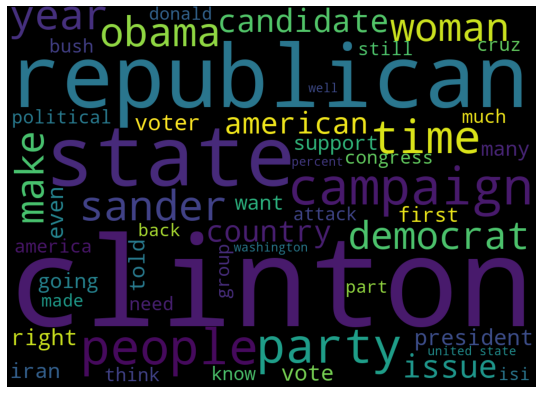

In [ ]:
news=message.loc[(message['Subject']=='News') & (message['Label']==1)]['News_text'].values
news_string=str(news)

import re
from nltk.corpus import stopwords

news_string2=re.sub(r"\([^()]*\)",r" ",news_string)
news_string2=re.sub(r'[^a-z A-Z]',r' ',news_string2)
news_string2=news_string2.lower()
news_string2=re.sub(r'\b\w{1,3}\b',r' ',news_string2)
news_string2=re.sub(r' +', r' ',news_string2)
news_string2 = [word for word in news_string2.split(" ") if not word in stopwords.words('english')]
worcloud_string=" ".join(news_string2)


from autocorrect import Speller
spell = Speller()
CorrectedArticle=spell(worcloud_string)
CorrectedArticlelist=CorrectedArticle.split(" ")


from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()
lem=[]
for i in CorrectedArticlelist:
  lem.append(lemmatizer.lemmatize(i))
lem=" ".join(lem)

%matplotlib inline
import matplotlib.pyplot as plt


from wordcloud import WordCloud, STOPWORDS

# Creating a custom list of stopwords
customStopwords=list(STOPWORDS)  + ['trump','said']

wordcloudimage = WordCloud( max_words=50,
                            font_step=2 ,
                            max_font_size=500,
                            stopwords=customStopwords,
                            width=1000,
                            height=720
                          ).generate(lem)

plt.figure(figsize=(15,7))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()

SUBJECT -> POLITICALFACT

In [ ]:
message['Subject'].unique()

array(['politicsNews', 'worldnews', 'News', 'PoliticalFact', 'left-news',
       'politics', 'Government News', 'Middle-east', 'US_News'],
      dtype=object)

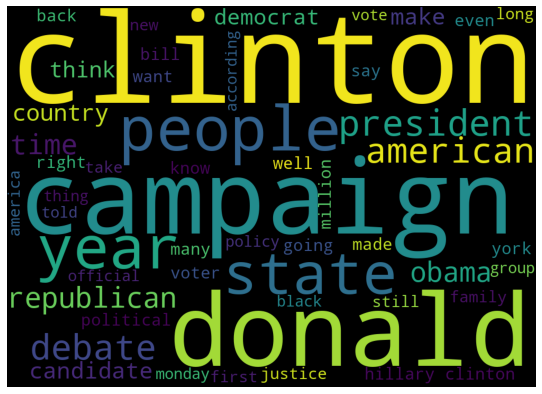

In [ ]:
news=message.loc[(message['Subject']=='PoliticalFact') & (message['Label']==1)]['News_text'].values
news_string=str(news)

import re
from nltk.corpus import stopwords

news_string2=re.sub(r"\([^()]*\)",r" ",news_string)
news_string2=re.sub(r'[^a-z A-Z]',r' ',news_string2)
news_string2=news_string2.lower()
news_string2=re.sub(r'\b\w{1,3}\b',r' ',news_string2)
news_string2=re.sub(r' +', r' ',news_string2)
news_string2 = [word for word in news_string2.split(" ") if not word in stopwords.words('english')]
worcloud_string=" ".join(news_string2)


from autocorrect import Speller
spell = Speller()
CorrectedArticle=spell(worcloud_string)
CorrectedArticlelist=CorrectedArticle.split(" ")


from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()
lem=[]
for i in CorrectedArticlelist:
  lem.append(lemmatizer.lemmatize(i))
lem=" ".join(lem)

%matplotlib inline
import matplotlib.pyplot as plt


from wordcloud import WordCloud, STOPWORDS

# Creating a custom list of stopwords
customStopwords=list(STOPWORDS)  + ['trump','said']

wordcloudimage = WordCloud( max_words=50,
                            font_step=2 ,
                            max_font_size=500,
                            stopwords=customStopwords,
                            width=1000,
                            height=720
                          ).generate(lem)

plt.figure(figsize=(15,7))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()

## WordCloud of fake data on subjectwise

In [ ]:
for i in message['Subject'].unique():
  print(i,' : ', message.loc[(message['Subject']==i) & (message['Label']==0)]['News_text'].count())

politicsNews  :  0
worldnews  :  0
News  :  9172
PoliticalFact  :  0
left-news  :  2419
politics  :  4317
Government News  :  882
Middle-east  :  393
US_News  :  382


Subject-> News

In [ ]:
message['Subject'].unique() 

array(['politicsNews', 'worldnews', 'News', 'PoliticalFact', 'left-news',
       'politics', 'Government News', 'Middle-east', 'US_News'],
      dtype=object)

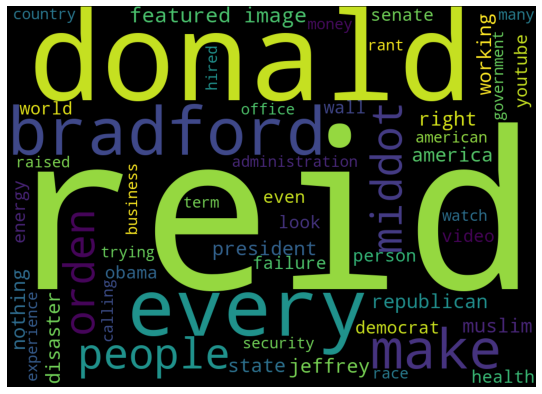

In [ ]:
news=message.loc[(message['Subject']=='News') & (message['Label']==0)]['News_text'].values
news_string=str(news)

import re
from nltk.corpus import stopwords

news_string2=re.sub(r"\([^()]*\)",r" ",news_string)
news_string2=re.sub(r'[^a-z A-Z]',r' ',news_string2)
news_string2=news_string2.lower()
news_string2=re.sub(r'\b\w{1,3}\b',r' ',news_string2)
news_string2=re.sub(r' +', r' ',news_string2)
news_string2 = [word for word in news_string2.split(" ") if not word in stopwords.words('english')]
worcloud_string=" ".join(news_string2)


from autocorrect import Speller
spell = Speller()
CorrectedArticle=spell(worcloud_string)
CorrectedArticlelist=CorrectedArticle.split(" ")


from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()
lem=[]
for i in CorrectedArticlelist:
  lem.append(lemmatizer.lemmatize(i))
lem=" ".join(lem)

%matplotlib inline
import matplotlib.pyplot as plt


from wordcloud import WordCloud, STOPWORDS

# Creating a custom list of stopwords
customStopwords=list(STOPWORDS)  + ['trump','said']

wordcloudimage = WordCloud( max_words=50,
                            font_step=2 ,
                            max_font_size=500,
                            stopwords=customStopwords,
                            width=1000,
                            height=720
                          ).generate(lem)

plt.figure(figsize=(15,7))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()

Subject -> left-news

In [ ]:
message['Subject'].unique()

array(['politicsNews', 'worldnews', 'News', 'PoliticalFact', 'left-news',
       'politics', 'Government News', 'Middle-east', 'US_News'],
      dtype=object)

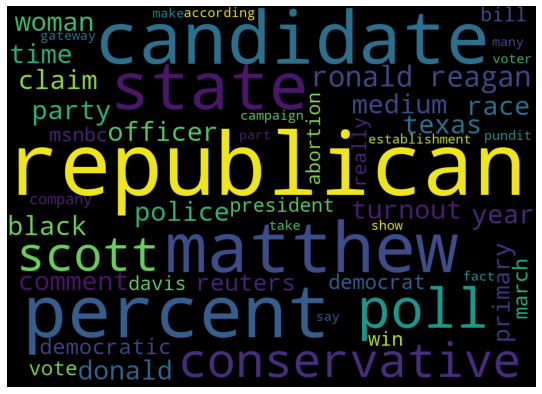

In [ ]:
news=message.loc[(message['Subject']=='left-news') & (message['Label']==0)]['News_text'].values
news_string=str(news)

import re
from nltk.corpus import stopwords

news_string2=re.sub(r"\([^()]*\)",r" ",news_string)
news_string2=re.sub(r'[^a-z A-Z]',r' ',news_string2)
news_string2=news_string2.lower()
news_string2=re.sub(r'\b\w{1,3}\b',r' ',news_string2)
news_string2=re.sub(r' +', r' ',news_string2)
news_string2 = [word for word in news_string2.split(" ") if not word in stopwords.words('english')]
worcloud_string=" ".join(news_string2)


from autocorrect import Speller
spell = Speller()
CorrectedArticle=spell(worcloud_string)
CorrectedArticlelist=CorrectedArticle.split(" ")


from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()
lem=[]
for i in CorrectedArticlelist:
  lem.append(lemmatizer.lemmatize(i))
lem=" ".join(lem)

%matplotlib inline
import matplotlib.pyplot as plt


from wordcloud import WordCloud, STOPWORDS

# Creating a custom list of stopwords
customStopwords=list(STOPWORDS)  + ['trump','said']

wordcloudimage = WordCloud( max_words=50,
                            font_step=2 ,
                            max_font_size=500,
                            stopwords=customStopwords,
                            width=1000,
                            height=720
                          ).generate(lem)

plt.figure(figsize=(15,7))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()

Subject -> politics

In [ ]:
message['Subject'].unique()

array(['politicsNews', 'worldnews', 'News', 'PoliticalFact', 'left-news',
       'politics', 'Government News', 'Middle-east', 'US_News'],
      dtype=object)

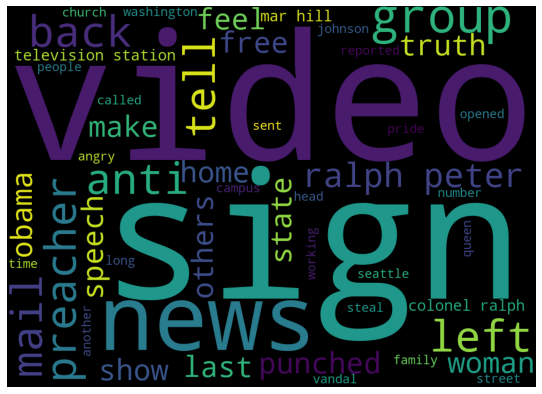

In [ ]:
news=message.loc[(message['Subject']=='politics') & (message['Label']==0)]['News_text'].values
news_string=str(news)

import re
from nltk.corpus import stopwords

news_string2=re.sub(r"\([^()]*\)",r" ",news_string)
news_string2=re.sub(r'[^a-z A-Z]',r' ',news_string2)
news_string2=news_string2.lower()
news_string2=re.sub(r'\b\w{1,3}\b',r' ',news_string2)
news_string2=re.sub(r' +', r' ',news_string2)
news_string2 = [word for word in news_string2.split(" ") if not word in stopwords.words('english')]
worcloud_string=" ".join(news_string2)


from autocorrect import Speller
spell = Speller()
CorrectedArticle=spell(worcloud_string)
CorrectedArticlelist=CorrectedArticle.split(" ")


from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()
lem=[]
for i in CorrectedArticlelist:
  lem.append(lemmatizer.lemmatize(i))
lem=" ".join(lem)

%matplotlib inline
import matplotlib.pyplot as plt


from wordcloud import WordCloud, STOPWORDS

# Creating a custom list of stopwords
customStopwords=list(STOPWORDS)  + ['trump','said']

wordcloudimage = WordCloud( max_words=50,
                            font_step=2 ,
                            max_font_size=500,
                            stopwords=customStopwords,
                            width=1000,
                            height=720
                          ).generate(lem)

plt.figure(figsize=(15,7))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()

SUBJECT -> Government News

In [ ]:
message['Subject'].unique()

array(['politicsNews', 'worldnews', 'News', 'PoliticalFact', 'left-news',
       'politics', 'Government News', 'Middle-east', 'US_News'],
      dtype=object)

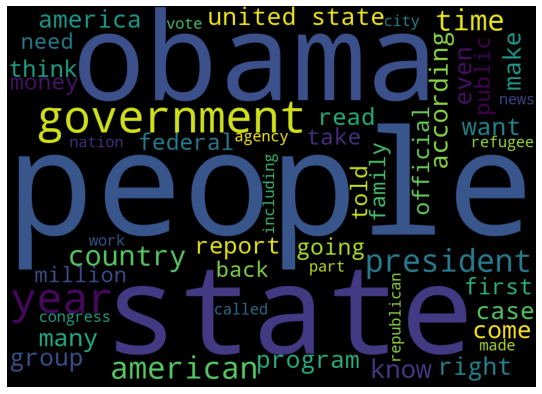

In [ ]:
news=message.loc[(message['Subject']=='Government News') & (message['Label']==0)]['News_text'].values
news_string=str(news)

import re
from nltk.corpus import stopwords

news_string2=re.sub(r"\([^()]*\)",r" ",news_string)
news_string2=re.sub(r'[^a-z A-Z]',r' ',news_string2)
news_string2=news_string2.lower()
news_string2=re.sub(r'\b\w{1,3}\b',r' ',news_string2)
news_string2=re.sub(r' +', r' ',news_string2)
news_string2 = [word for word in news_string2.split(" ") if not word in stopwords.words('english')]
worcloud_string=" ".join(news_string2)


from autocorrect import Speller
spell = Speller()
CorrectedArticle=spell(worcloud_string)
CorrectedArticlelist=CorrectedArticle.split(" ")


from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()
lem=[]
for i in CorrectedArticlelist:
  lem.append(lemmatizer.lemmatize(i))
lem=" ".join(lem)

%matplotlib inline
import matplotlib.pyplot as plt


from wordcloud import WordCloud, STOPWORDS

# Creating a custom list of stopwords
customStopwords=list(STOPWORDS)  + ['trump','said']

wordcloudimage = WordCloud( max_words=50,
                            font_step=2 ,
                            max_font_size=500,
                            stopwords=customStopwords,
                            width=1000,
                            height=720
                          ).generate(lem)

plt.figure(figsize=(15,7))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()

SUBJECT -> Middle-east


In [ ]:
message['Subject'].unique()

array(['politicsNews', 'worldnews', 'News', 'PoliticalFact', 'left-news',
       'politics', 'Government News', 'Middle-east', 'US_News'],
      dtype=object)

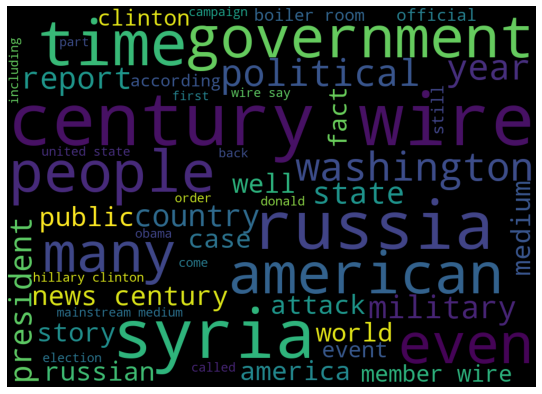

In [ ]:
news=message.loc[(message['Subject']=='Middle-east') & (message['Label']==0)]['News_text'].values
news_string=str(news)

import re
from nltk.corpus import stopwords

news_string2=re.sub(r"\([^()]*\)",r" ",news_string)
news_string2=re.sub(r'[^a-z A-Z]',r' ',news_string2)
news_string2=news_string2.lower()
news_string2=re.sub(r'\b\w{1,3}\b',r' ',news_string2)
news_string2=re.sub(r' +', r' ',news_string2)
news_string2 = [word for word in news_string2.split(" ") if not word in stopwords.words('english')]
worcloud_string=" ".join(news_string2)


from autocorrect import Speller
spell = Speller()
CorrectedArticle=spell(worcloud_string)
CorrectedArticlelist=CorrectedArticle.split(" ")


from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()
lem=[]
for i in CorrectedArticlelist:
  lem.append(lemmatizer.lemmatize(i))
lem=" ".join(lem)

%matplotlib inline
import matplotlib.pyplot as plt


from wordcloud import WordCloud, STOPWORDS

# Creating a custom list of stopwords
customStopwords=list(STOPWORDS)  + ['trump','said']

wordcloudimage = WordCloud( max_words=50,
                            font_step=2 ,
                            max_font_size=500,
                            stopwords=customStopwords,
                            width=1000,
                            height=720
                          ).generate(lem)

plt.figure(figsize=(15,7))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()

SUBJECT -> US_News

In [ ]:
message['Subject'].unique()

array(['politicsNews', 'worldnews', 'News', 'PoliticalFact', 'left-news',
       'politics', 'Government News', 'Middle-east', 'US_News'],
      dtype=object)

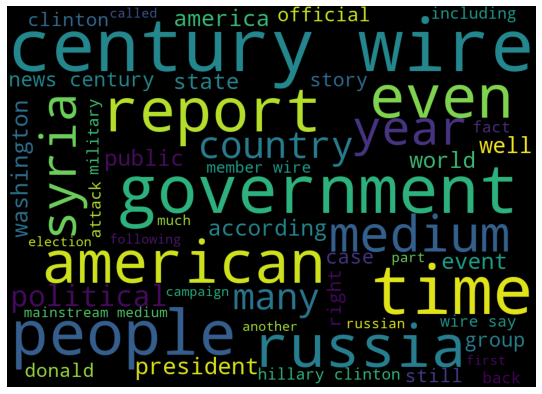

In [ ]:
news=message.loc[(message['Subject']=='US_News') & (message['Label']==0)]['News_text'].values
news_string=str(news)

import re
from nltk.corpus import stopwords

news_string2=re.sub(r"\([^()]*\)",r" ",news_string)
news_string2=re.sub(r'[^a-z A-Z]',r' ',news_string2)
news_string2=news_string2.lower()
news_string2=re.sub(r'\b\w{1,3}\b',r' ',news_string2)
news_string2=re.sub(r' +', r' ',news_string2)
news_string2 = [word for word in news_string2.split(" ") if not word in stopwords.words('english')]
worcloud_string=" ".join(news_string2)


from autocorrect import Speller
spell = Speller()
CorrectedArticle=spell(worcloud_string)
CorrectedArticlelist=CorrectedArticle.split(" ")


from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()
lem=[]
for i in CorrectedArticlelist:
  lem.append(lemmatizer.lemmatize(i))
lem=" ".join(lem)

%matplotlib inline
import matplotlib.pyplot as plt


from wordcloud import WordCloud, STOPWORDS

# Creating a custom list of stopwords
customStopwords=list(STOPWORDS)  + ['trump','said']

wordcloudimage = WordCloud( max_words=50,
                            font_step=2 ,
                            max_font_size=500,
                            stopwords=customStopwords,
                            width=1000,
                            height=720
                          ).generate(lem)

plt.figure(figsize=(15,7))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()

## TextBlob on real data label=1

In [ ]:
import re
text=re.sub(r'\([^)]*\)',r'', news_string)
text=re.sub(r'[^a-z A-Z . , 0-9 $]',r'', news_string)

In [24]:
news_string

"['WASHINGTON (Reuters) - A lawyer nominated by President Donald Trump to serve as a federal judge withdrew from consideration on Monday after video of his Senate confirmation hearing showing him unable to provide answers to rudimentary legal questions went viral last week. Trump accepted Matthew Petersenâ€™s offer to withdraw his nomination as a district court judge in Washington, a White House official said. Petersen, a Republican member of the Federal Election Commission, became the latest of Trumpâ€™s judicial nominations to fail as the president seeks to win confirmation of judges who will make the federal judiciary more conservative. â€œJust because youâ€™ve seen â€˜My Cousin Vinnyâ€™ doesnâ€™t qualify you to be a federal judge,â€\\x9d Republican Senator John Kennedy, who grilled Petersen during his Dec. 13 confirmation hearing, told WWL-TV, referring to the 1992 comedy film about a novice lawyer. Kennedy, who has been critical of some of Trumpâ€™s judicial nominees, asked severa

In [25]:
text

'WASHINGTON Reuters  A lawyer nominated by President Donald Trump to serve as a federal judge withdrew from consideration on Monday after video of his Senate confirmation hearing showing him unable to provide answers to rudimentary legal questions went viral last week. Trump accepted Matthew Petersens offer to withdraw his nomination as a district court judge in Washington, a White House official said. Petersen, a Republican member of the Federal Election Commission, became the latest of Trumps judicial nominations to fail as the president seeks to win confirmation of judges who will make the federal judiciary more conservative. Just because youve seen My Cousin Vinny doesnt qualify you to be a federal judge,x9d Republican Senator John Kennedy, who grilled Petersen during his Dec. 13 confirmation hearing, told WWLTV, referring to the 1992 comedy film about a novice lawyer. Kennedy, who has been critical of some of Trumps judicial nominees, asked several basic legal questions that Peter

In [26]:
# Textblob library installation
!pip install textblob

# installing the wordcloud library
!pip install wordcloud

########################################################################
# Finding the important word combinations using textblob
from textblob import TextBlob

crt = TextBlob(text)
SampleTextInBlobFormat = crt.correct()

In [27]:
SampleTextInBlobFormat

TextBlob("WASHINGTON Letters  A lawyer nominated by President Donald Plump to serve as a federal judge withdrew from consideration on Monday after video of his Senate confirmation hearing showing him unable to provide answers to rudimentary legal questions went vital last week. Plump accepted Matthew Petersens offer to withdraw his nomination as a district court judge in Washington, a White House official said. Peterson, a Republican member of the Federal Election Commission, became the latest of Drums judicial nomination to fail as the president seeks to win confirmation of judges who will make the federal judiciary more conservative. Must because you seen By Cousin Inn doesn qualify you to be a federal judge,and Republican Senator John Penned, who drilled Peterson during his Dec. 13 confirmation hearing, told WWLTV, referring to the 1992 comedy film about a novice lawyer. Penned, who has been critical of some of Drums judicial nominee, asked several basic legal questions that Peterso

In [33]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
nltk.download('brown')
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


##### Important word combinations ####
washington donald_plump federal_judge_withdrew senate_confirmation_hearing legal_questions plump matthew_petersens district_court_judge washington white_house peterson republican federal_election_commission drums judicial_nomination federal_judiciary cousin inn_doesn federal_judge republican john_penned peterson dec. confirmation_hearing wwltv comedy_film novice_lawyer penned drums judicial_nominee basic_legal_questions peterson cable_news_shows peterson withdrawal_letter plump public_service peterson peterson plump past_week republican chuck_grassley judiciary drums jeff_father great_valley controversial_statements online_magazine late sympathetic_comments early_history u_klux plan_kkk white_supremacist_group white_house_counsels_office overseas_judicial_nomination father transgender_children matas cnn plump significant_progress federal_courts conservative_judges important_courts veil_gorsuch courts high_courts conservative_majority u.s sick_urba

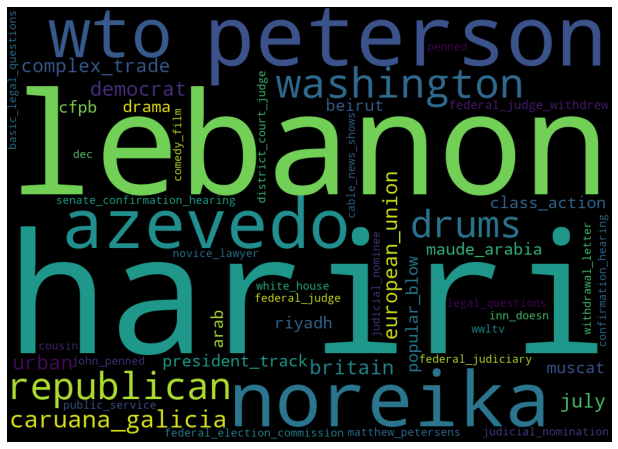

In [37]:
# Finding the noun phrases (important keywords combination) in the text
# This can help to find out what entities are being talked about in the given text
NounPhrases=SampleTextInBlobFormat.noun_phrases

# Creating an empty list to hold new values
# combining the noun phrases using underscore to visualize it as wordcloud
NewNounList=[]
for words in NounPhrases:
    NewNounList.append(words.replace(" ", "_"))
    
# Converting list into a string to plot wordcloud
NewNounString=' '.join(NewNounList)
print('##### Important word combinations ####')
print(NewNounString)

# Creating a custom list of stopwords
customStopwords=list(STOPWORDS) + ['plump','donald_plump']

########################################################################
# Plotting the wordcloud
%matplotlib inline
import matplotlib.pyplot as plt


from wordcloud import WordCloud, STOPWORDS


wordcloudimage = WordCloud( max_words=50,
                            font_step=2 ,
                            max_font_size=500,
                            background_color='black',
                           stopwords=customStopwords,
                            width=1000,
                            height=720
                          ).generate(NewNounString)

plt.figure(figsize=(20,8))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()

## TextBlob on fake data label=0

In [ ]:
text=re.sub(r'\([^)]*\)',r'', news_string_fake)
text=re.sub(r'[^a-z A-Z . , 0-9 $]',r'', news_string_fake)

In [ ]:
news_string_fake

"['Senate Minority Leader Harry Reid has it out for Republican nominee Donald Trump.On Thursday on the Senate floor, Senator Reid (D-Nev.) unleashed a rant against the business mogul with a bitterness that makes you wonder just how long he had been holding it in. Reid is approaching retirement as January draws near, and it s clear that the Democratic leader wants America to understand just how important it is to make sure that the country isn t left in Trump s little, orange, greedy hands.Making reference to a Newsweek article that questions the Trump Organization s international business ties and suggests that a President Trump could be disastrous for national security, Reid called Trump  a spoiled brat  and  a notorious con artist  whose questionable, scammy business practices would only spill over into his administration if he becomes President. Reid said: Let s be clear about Donald Trump. He s a spoiled brat, raised in plenty, who inherited a fortune, used his money to make more m

In [ ]:
text

'Senate Minority Leader Harry Reid has it out for Republican nominee Donald Trump.On Thursday on the Senate floor, Senator Reid DNev. unleashed a rant against the business mogul with a bitterness that makes you wonder just how long he had been holding it in. Reid is approaching retirement as January draws near, and it s clear that the Democratic leader wants America to understand just how important it is to make sure that the country isn t left in Trump s little, orange, greedy hands.Making reference to a Newsweek article that questions the Trump Organization s international business ties and suggests that a President Trump could be disastrous for national security, Reid called Trump  a spoiled brat  and  a notorious con artist  whose questionable, scammy business practices would only spill over into his administration if he becomes President. Reid said Let s be clear about Donald Trump. He s a spoiled brat, raised in plenty, who inherited a fortune, used his money to make more money, 

In [ ]:
# Textblob library installation
# !pip install textblob

# installing the wordcloud library
# !pip install wordcloud

########################################################################
# Finding the important word combinations using textblob
from textblob import TextBlob

crt = TextBlob(text)
SampleTextInBlobFormat = crt.correct()

In [ ]:
SampleTextInBlobFormat

TextBlob("Senate Minority Leader Carry Reid has it out for Republican nominee Donald Plump.In Thursday on the Senate floor, Senator Reid kiev. unleashed a want against the business soul with a bitterness that makes you wonder just how long he had been holding it in. Reid is approaching retirement as January draws near, and it s clear that the Democratic leader wants America to understand just how important it is to make sure that the country isn t left in Plump s little, orange, greedy hands.Taking reference to a Newsweek article that questions the Plump Organization s international business ties and suggests that a President Plump could be disastrous for national security, Reid called Plump  a spoiled brat  and  a notorious con artist  whose questionable, scanty business practices would only spill over into his administration if he becomes President. Reid said Met s be clear about Donald Plump. He s a spoiled brat, raised in plenty, who inherited a fortune, used his money to make more

##### Important word combinations ####
minority carry_reid republican donald_plump.in senate_floor reid business_soul reid january democratic_leader america country_isn_t plump newsweek plump organization_s international_business_ties plump national_security reid plump notorious_con_artist scanty_business_practices reid met donald_plump plump america donald_plump donald_plump donald_plump america big_scar plump reid plump human_leech plump human_leech golf_resort reid amazing_antitrump reid pretty_epic plump plump reid plump democratic_nominee axillary_clinton s_health plump drawing_attention own_unhealthy_lifestyle reid took met carry_reid flex petty_images axillary_clinton finish_line mainstream_media rino important_factor massive_trout plump donald_began donald_j plump general_election media_plays new_letters_poll presidential_race democratic_side campaign_corks.the_poll_shows_presumptive democratic_nominee axillary_clinton republican donald_plump sewed.the_gateway_unit_reports repu

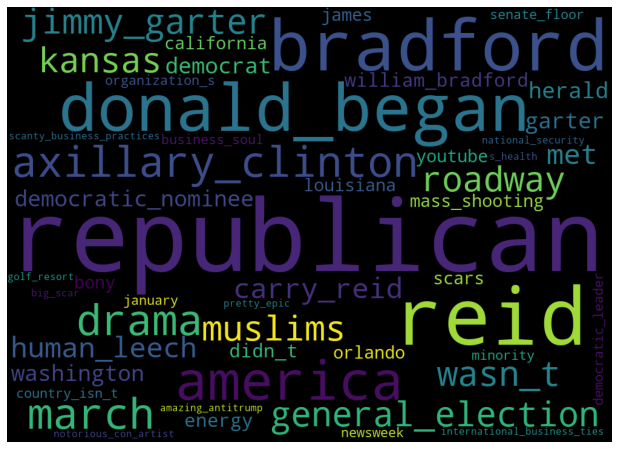

In [ ]:
# Finding the noun phrases (important keywords combination) in the text
# This can help to find out what entities are being talked about in the given text
NounPhrases=SampleTextInBlobFormat.noun_phrases

# Creating an empty list to hold new values
# combining the noun phrases using underscore to visualize it as wordcloud
NewNounList=[]
for words in NounPhrases:
    NewNounList.append(words.replace(" ", "_"))
    
# Converting list into a string to plot wordcloud
NewNounString=' '.join(NewNounList)
print('##### Important word combinations ####')
print(NewNounString)

# Creating a custom list of stopwords
customStopwords=list(STOPWORDS) + ['plump','trump','donald_plump']

########################################################################
# Plotting the wordcloud
%matplotlib inline
import matplotlib.pyplot as plt


from wordcloud import WordCloud, STOPWORDS


wordcloudimage = WordCloud( max_words=50,
                            font_step=2 ,
                            max_font_size=500,
                            background_color='black',
                           stopwords=customStopwords,
                            width=1000,
                            height=720
                          ).generate(NewNounString)

plt.figure(figsize=(20,8))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()

## NLTK word filter

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
nltk.download('brown')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [ ]:
message.reset_index(inplace=True)

In [ ]:
message=message.drop(columns='index',axis=1)

In [ ]:
import re
from nltk.corpus import stopwords 
# from nltk.stem.porter import PorterStemmer
import re
# ps=PorterStemmer()
newsText=[]

for i in range(0,len(message)):
  review = re.sub(r"\([^()]*\)",r" ",message['News_text'][i])
  review = re.sub(r'[^a-z A-Z]',r' ',review)
  review = review.lower()
  review = re.sub(r'\b\w{1,3}\b',r' ',review)
  review = re.sub(r' +', r' ',review)
  review = review.split()

  # review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = [word for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  newsText.append(review)

In [ ]:
newsText

['washington lawyer nominated president donald trump serve federal judge withdrew consideration monday video senate confirmation hearing showing unable provide answers rudimentary legal questions went viral last week trump accepted matthew petersen offer withdraw nomination district court judge washington white house official said petersen republican member federal election commission became latest trump judicial nominations fail president seeks confirmation judges make federal judiciary conservative seen cousin vinny qualify federal judge republican senator john kennedy grilled petersen confirmation hearing told referring comedy film novice lawyer kennedy critical trump judicial nominees asked several basic legal questions petersen could answer video shown cable news shows widely viewed internet honored nominated position become clear past days nomination become distraction fair administration petersen wrote withdrawal letter trump hoped nearly decades public service might carry weigh

In [ ]:
# Import pickle Package

import pickle

# Save the Modle to file in the current working directory

Pkl_Filename = "/content/drive/MyDrive/Colab Notebooks/newstext.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(newsText, file)
    file.close()

In [ ]:
import pickle
# Load the Model back from file
# Pkl_Filename='/content/Pickle_RL_Model.pkl'
# Drive location
Pkl_Filename = "/content/drive/MyDrive/Colab Notebooks/newstext.pkl"

with open(Pkl_Filename, 'rb') as file:  
    newsText = pickle.load(file)
    file.close()

newsText

['washington lawyer nominated president donald trump serve federal judge withdrew consideration monday video senate confirmation hearing showing unable provide answers rudimentary legal questions went viral last week trump accepted matthew petersen offer withdraw nomination district court judge washington white house official said petersen republican member federal election commission became latest trump judicial nominations fail president seeks confirmation judges make federal judiciary conservative seen cousin vinny qualify federal judge republican senator john kennedy grilled petersen confirmation hearing told referring comedy film novice lawyer kennedy critical trump judicial nominees asked several basic legal questions petersen could answer video shown cable news shows widely viewed internet honored nominated position become clear past days nomination become distraction fair administration petersen wrote withdrawal letter trump hoped nearly decades public service might carry weigh

In [ ]:
!pip install tqdm  
!pip install autocorrect

# importing modules  
from tqdm import trange  
# from time import sleep

from autocorrect import Speller
spell = Speller()
news=[]

# creating loop 
for i,num in zip(newsText,trange(len(newsText))):
  news.append(spell(i))

In [ ]:
# Import pickle Package

import pickle

# Save the Modle to file in the current working directory

Pkl_Filename = "/content/drive/MyDrive/Colab Notebooks/news.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(news, file)
    file.close()

In [ ]:
import pickle

# Load the Model back from file

# Drive location
Pkl_Filename = "/content/drive/MyDrive/Colab Notebooks/news.pkl"

with open(Pkl_Filename, 'rb') as file:  
    news = pickle.load(file)
    file.close()

In [ ]:
!pip install tqdm  
!pip install KrovetzStemmer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
nltk.download('brown')

import nltk

# importing modules  
from tqdm import trange  

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

from krovetzstemmer import Stemmer 
stemmer = Stemmer() 


lem2=[]

for i,num in zip(news,trange(len(news))):
  lem=[]
  nltk_tokens = nltk.word_tokenize(i)
  for j in nltk_tokens:
    lemm=lemmatizer.lemmatize(j)
    lemm=stemmer.stem(lemm)
    lem.append(lemm)
  lem=" ".join(lem)
  lem2.append(lem)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package brown to /root/nltk_data...


  0%|          | 0/39085 [00:00<?, ?it/s]

[nltk_data]   Unzipping corpora/brown.zip.


100%|█████████▉| 39052/39085 [01:24<00:00, 505.92it/s]

In [ ]:
lem2

In [ ]:
from nltk.corpus import stopwords 

import re

titletext=[]
heavyfiletitle=[]
for i in range(0,len(message)):
  review = re.sub(r"\([^()]*\)",r" ",message['Title'][i])
  review = re.sub(r'[^a-z A-Z]',r' ',review)
  review = review.lower()
  review = re.sub(r'\b\w{1,3}\b',r' ',review)
  review = re.sub(r' +', r' ',review)
  review = review.split()
  
  review = [word for word in review if not word in stopwords.words('english')]
  heavyfiletitle.append(review)
  review = ' '.join(review)
  titletext.append(review)

In [ ]:
# !pip install tqdm  
!pip install autocorrect

# importing modules  
from tqdm import trange  
# from time import sleep

from autocorrect import Speller
spell = Speller()
title=[]

# creating loop 
for i,num in zip(titletext,trange(len(titletext))):
  title.append(spell(i))

     |████████████████████████████████| 624kB 7.3MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.3.0-cp37-none-any.whl size=621587 sha256=1a7e2cb5af445b0bfe49d8c984b677e615e3b6d921fdd5572053ba3aece4d5a9
  Stored in directory: /root/.cache/pip/wheels/cc/1c/30/6b0199afbd20eef5959f5eaa0ead86aeef84391740482b2279
Successfully built autocorrect


Streaming output truncated to the last 5000 lines.
 99%|█████████▉| 38693/39085 [18:26<00:10, 36.34it/s]

In [ ]:
title

['trump judicial nominee withdraws consideration',
 'democrat senate calls ranked resign',
 'chief debate trump rallies support trade',
 'hungary says facing frontal assault financier sorts',
 'senate republicans shove bill ahead democrats fame',
 'bush endorses cruz republican nomination',
 'trump dogged home begins longest presidential asia trip years',
 'china head says trump careful considering tariffs office',
 'white house keep paying obamacare subsidies official',
 'come testify senate panel public session',
 'sanders wins wyoming prepares take clinton york',
 'philippine lawyers supreme court halt illegal drugs',
 'house democrats press trump release returns',
 'turkey erdogan blames envoy diplomatic crisis',
 'governor yemen interim capital resigns accuses corruption',
 'house panel take bill spur generic drug development',
 'republican leader plans senate vote healthcare next week media',
 'merkel conservatives lead sunday vote right gains poll',
 'foreign minister criticized

In [ ]:
# Import pickle Package

import pickle

# Save the Modle to file in the current working directory

Pkl_Filename = "/content/drive/MyDrive/Colab Notebooks/title.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(title, file)
    file.close()

In [ ]:
import pickle

# Load the Model back from file

# Drive location
Pkl_Filename = "/content/drive/MyDrive/Colab Notebooks/title.pkl"

with open(Pkl_Filename, 'rb') as file:  
    title = pickle.load(file)
    file.close()

In [ ]:
!pip install tqdm  
!pip install KrovetzStemmer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
nltk.download('brown')

import nltk

# importing modules  
from tqdm import trange  

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

from krovetzstemmer import Stemmer 
stemmer = Stemmer() 


lem2title=[]

for i,num in zip(title,trange(len(title))):
  lem=[]
  nltk_tokens = nltk.word_tokenize(i)
  for j in nltk_tokens:
    lemm=lemmatizer.lemmatize(j)
    lemm=stemmer.stem(lemm)
    lem.append(lemm)
  lem=" ".join(lem)
  lem2title.append(lem)



  0%|          | 0/39085 [00:00<?, ?it/s]

  2%|▏         | 660/39085 [00:00<00:05, 6594.94it/s]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!




  3%|▎         | 1282/39085 [00:00<00:05, 6475.88it/s]

  5%|▍         | 1940/39085 [00:00<00:05, 6503.96it/s]

  7%|▋         | 2587/39085 [00:00<00:05, 6493.38it/s]

  8%|▊         | 3252/39085 [00:00<00:05, 6538.50it/s]

 10%|▉         | 3880/39085 [00:00<00:05, 6456.79it/s]

 12%|█▏        | 4540/39085 [00:00<00:05, 6497.14it/s]

 13%|█▎        | 5184/39085 [00:00<00:05, 6478.38it/s]

 15%|█▍        | 5844/39085 [00:00<00:05, 6511.85it/s]

 17%|█▋        | 6506/39085 [00:01<00:04, 6541.99it/s]

 18%|█▊        | 7174/39085 [00:01<00:04, 6582.65it/s]

 20%|██        | 7831/39085 [00:01<00:04, 6577.14it/s]

 22%|██▏       | 8494/39085 [00:01<00:04, 6592.80it/s]

 23%|██▎       | 9153/39085 [00:01<00:04, 6591.74it/s]

 25%|██▌       | 9812/39085 [00:01<00:04, 6588.46it/s]

 27%|██▋       | 10479/39085 [00:01<00:04, 6610.24it/s]

 29%|██▊       | 11159/39085 [00:01<00:04, 6663.67it/s]

 30%|███       | 11824/39085 [00:01<00:04, 6637.76it/s]

 32%|███▏      | 12494/39085 [00:01<00:03, 

In [ ]:
message.index

RangeIndex(start=0, stop=39085, step=1)

In [ ]:
dataframe=pd.DataFrame(data=lem2title,index=message.index,columns=['Title'])
dataframe

Title
0          trump judicial nominee withdraw consideration
1                       democrat senate call rank resign
2                 chief debate trump rally support trade
3      hungary say facing frontal assault financier sort
4       senate republican shove bill ahead democrat fame
...                                                  ...
39080  watch rachel middot perfect argument prove tru...
39081  ironic white southern bill clinton told black ...
39082  watch tony award give hateful right middle fin...
39083  bill mate get dagger liberal california crush ...
39084  state dept release clinton mail white house re...

[39085 rows x 1 columns]

In [ ]:
dataframe['ID']=range(0,len(dataframe))

In [ ]:
dataframe

Title     ID
0          trump judicial nominee withdraw consideration      0
1                       democrat senate call rank resign      1
2                 chief debate trump rally support trade      2
3      hungary say facing frontal assault financier sort      3
4       senate republican shove bill ahead democrat fame      4
...                                                  ...    ...
39080  watch rachel middot perfect argument prove tru...  39080
39081  ironic white southern bill clinton told black ...  39081
39082  watch tony award give hateful right middle fin...  39082
39083  bill mate get dagger liberal california crush ...  39083
39084  state dept release clinton mail white house re...  39084

[39085 rows x 2 columns]

In [ ]:
from pandas import DataFrame

newsText = DataFrame(lem2,columns=['News_text'])
# print (newsText)

newsText

News_text
0      washington lawyer nominate president donald tr...
1      senator dick during democrat senate said wedne...
2      geneva head world trade organization said wedn...
3      budapest hungary facing frontal assault financ...
4      washington senate republican ram forward presi...
...                                                  ...
39080  donald trump bag want rachel middot know trump...
39081    oops bill clinton said thing make america great
39082  overwhelm sad mass shoot orlando florida peopl...
39083  bill mate finished friday episode real time ab...
39084  state department release clinton mail today pl...

[39085 rows x 1 columns]

In [ ]:
newsText['ID']=range(0,len(newsText))

In [ ]:
newsText

News_text     ID
0      washington lawyer nominate president donald tr...      0
1      senator dick during democrat senate said wedne...      1
2      geneva head world trade organization said wedn...      2
3      budapest hungary facing frontal assault financ...      3
4      washington senate republican ram forward presi...      4
...                                                  ...    ...
39080  donald trump bag want rachel middot know trump...  39080
39081    oops bill clinton said thing make america great  39081
39082  overwhelm sad mass shoot orlando florida peopl...  39082
39083  bill mate finished friday episode real time ab...  39083
39084  state department release clinton mail today pl...  39084

[39085 rows x 2 columns]

In [ ]:
mergedata=pd.merge(dataframe, newsText,on='ID')

In [ ]:
mergedata

Title  ...                                          News_text
0          trump judicial nominee withdraw consideration  ...  washington lawyer nominate president donald tr...
1                       democrat senate call rank resign  ...  senator dick during democrat senate said wedne...
2                 chief debate trump rally support trade  ...  geneva head world trade organization said wedn...
3      hungary say facing frontal assault financier sort  ...  budapest hungary facing frontal assault financ...
4       senate republican shove bill ahead democrat fame  ...  washington senate republican ram forward presi...
...                                                  ...  ...                                                ...
39080  watch rachel middot perfect argument prove tru...  ...  donald trump bag want rachel middot know trump...
39081  ironic white southern bill clinton told black ...  ...    oops bill clinton said thing make america great
39082  watch tony award give hateful right middle fin...  ...  overwhelm sad mass shoot orlando florida peopl...
39083  bill mate get dagger liberal california crush ...  ...  bill mate finished friday episode real time ab...
39084  state dept release clinton mail white house re...  ...  state department release clinton mail today pl...

[39085 rows x 3 columns]

In [ ]:
message['ID']=range(len(message))

In [ ]:
mergedata=mergedata.merge(message['Subject'],on=message['ID'])

In [ ]:
mergedata=mergedata.drop(['key_0'],axis=1)

In [ ]:
mergedata=mergedata.merge(message['Label'],on=message['ID'])

In [ ]:
mergedata=mergedata.drop(['key_0'],axis=1)

In [ ]:
mergedata

Title  ...  Label
0          trump judicial nominee withdraw consideration  ...      1
1                       democrat senate call rank resign  ...      1
2                 chief debate trump rally support trade  ...      1
3      hungary say facing frontal assault financier sort  ...      1
4       senate republican shove bill ahead democrat fame  ...      1
...                                                  ...  ...    ...
39080  watch rachel middot perfect argument prove tru...  ...      0
39081  ironic white southern bill clinton told black ...  ...      0
39082  watch tony award give hateful right middle fin...  ...      0
39083  bill mate get dagger liberal california crush ...  ...      0
39084  state dept release clinton mail white house re...  ...      0

[39085 rows x 5 columns]

In [ ]:
mergedata.groupby('Label').size()

Label
0    17565
1    21520
dtype: int64

In [ ]:
mergedata=mergedata.drop('ID',axis=1)

## Filtered MergedData

In [ ]:
# Import pickle Package

import pickle

# Save the Modle to file in the current working directory

Pkl_Filename = "/content/drive/MyDrive/Colab Notebooks/Pickle_RL_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(mergedata, file)
    file.close()

In [ ]:
import pickle
# Load the Model back from file
# Pkl_Filename='/content/Pickle_RL_Model.pkl'
# Drive location
Pkl_Filename = "/content/drive/MyDrive/Colab Notebooks/Pickle_RL_Model.pkl"

with open(Pkl_Filename, 'rb') as file:  
    Pickled_data = pickle.load(file)
    file.close()

Pickled_data

Title  ... Label
0          trump judicial nominee withdraw consideration  ...     1
1                       democrat senate call rank resign  ...     1
2                 chief debate trump rally support trade  ...     1
3      hungary say facing frontal assault financier sort  ...     1
4       senate republican shove bill ahead democrat fame  ...     1
...                                                  ...  ...   ...
39080  watch rachel middot perfect argument prove tru...  ...     0
39081  ironic white southern bill clinton told black ...  ...     0
39082  watch tony award give hateful right middle fin...  ...     0
39083  bill mate get dagger liberal california crush ...  ...     0
39084  state dept release clinton mail white house re...  ...     0

[39085 rows x 4 columns]

In [ ]:
X = Pickled_data.iloc[:,:-1].values
y = Pickled_data.iloc[:,-1].values

In [ ]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000)
mat_text = cv.fit_transform(X[:,1]).todense()

In [ ]:
mat_text

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000)
mat_title = cv.fit_transform(X[:,0]).todense()

In [ ]:
mat_title

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000)
mat_subject = cv.fit_transform(X[:,2]).todense()

In [ ]:
mat_subject

matrix([[0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
import numpy as np
X_mat=np.hstack((mat_title,mat_text,mat_subject))

In [ ]:
X_mat.shape

(39085, 10010)

## Pickle package for MATRIX data

In [ ]:
# Import pickle Package

import pickle

# Save the Modle to file in the current working directory
Pkl_Filename = "/content/drive/MyDrive/Colab Notebooks/Pickle_CountVec.pkl" 

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(X_mat, file)
    file.close()

In [ ]:
import pickle
# Load the Model back from file

Pkl_Filename = "/content/drive/MyDrive/Colab Notebooks/Pickle_CountVec.pkl" 

with open(Pkl_Filename, 'rb') as file:  
    CountVec_data = pickle.load(file)
    file.close()
CountVec_data

matrix([[0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# Picke package for y data

import pickle

# Save the Modle to file in the current working directory
Pkl_Filename = "/content/drive/MyDrive/Colab Notebooks/Pickle_CountVec_y.pkl"

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(y, file)
    file.close()

In [ ]:
import pickle
# Load the Model back from file
Pkl_Filename = "/content/drive/MyDrive/Colab Notebooks/Pickle_CountVec_y.pkl"


with open(Pkl_Filename, 'rb') as file:  
    CountVec_y_data = pickle.load(file)
    file.close()

CountVec_y_data

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
CountVec_data.shape,CountVec_y_data.shape

((39085, 10010), (39085,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(CountVec_data,CountVec_y_data,test_size=0.3,random_state=0)

## Model Creation

In [ ]:
# notebook in google colab restarting.
# Logistic regression
from sklearn.linear_model import LogisticRegression

lrc =  LogisticRegression(C=5,penalty='l2',solver='newton-cg',max_iter=500)
print(lrc)
lrc.fit(X_train,y_train)
y_pred=lrc.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(f1_score(y_test,y_pred,average='weighted'))

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
[[5274   10]
 [  39 6403]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5284
           1       1.00      0.99      1.00      6442

    accuracy                           1.00     11726
   macro avg       1.00      1.00      1.00     11726
weighted avg       1.00      1.00      1.00     11726

0.9958222562642589


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=10,n_estimators=200,criterion='gini')
print(rfc)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(f1_score(y_test,y_pred))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
[[5047  237]
 [  65 6377]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      5284
           1       0.96      0.99      0.98      6442

    accuracy                           0.97     11726
   macro avg       0.98      0.97      0.97     11726
weighted avg       0.97      0.97      0.97     11726

0.9768688725490197


In [ ]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=3)
abc = AdaBoostClassifier(n_estimators=100,base_estimator=dtc,learning_rate=0.1)
print(abc)
abc.fit(X_train,y_train)
y_pred=abc.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(f1_score(y_test,y_pred))
# 44m 26s


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [ ]:
# Crashing due to heavy RAM usage
# XGBoost
# !pip install xgboost
from xgboost import XGBClassifier

xgc = XGBClassifier(max_depth=2,n_estimators=200,objective='binary:logistic',booster='gbtree',learning_rate=0.1)
print(xgc)
xgc.fit(X_train,y_train)
y_pred=xgc.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(f1_score(y_test,y_pred))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
[[5284    0]
 [  25 6417]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5284
           1       1.00      1.00      1.00      6442

    accuracy                           1.00     11726
   macro avg       1.00      1.00      1.00     11726
weighted avg       1.00      1.00      1.00     11726

0.9980558363791896


In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=4)
print(clf)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(f1_score(y_test,y_pred))
#2h in tpu high-ram

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')
[[4045 1239]
 [ 758 5684]]
              precision    recall  f1-score   support

           0       0.84      0.77      0.80      5284
           1       0.82      0.88      0.85      6442

    accuracy                           0.83     11726
   macro avg       0.83      0.82      0.83     11726
weighted avg       0.83      0.83      0.83     11726

0.8505798728020949


In [ ]:
# SVM
from sklearn.svm import SVC

clf = SVC()
print(clf)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(f1_score(y_test,y_pred))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=True)
[LibSVM][[5238   46]
 [  73 6369]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5284
           1       0.99      0.99      0.99      6442

    accuracy                           0.99     11726
   macro avg       0.99      0.99      0.99     11726
weighted avg       0.99      0.99      0.99     11726

0.9907443416037957


In [ ]:
# naive_bayes
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
print(clf)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(f1_score(y_test,y_pred))

GaussianNB(priors=None, var_smoothing=1e-09)
[[5065  219]
 [  61 6381]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      5284
           1       0.97      0.99      0.98      6442

    accuracy                           0.98     11726
   macro avg       0.98      0.97      0.98     11726
weighted avg       0.98      0.98      0.98     11726

0.9785309001686857


# Deployment of the Model


#### Step 1. Retraining the model using 100% data

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

#choose from different tunable hyper parameters
dtc = DecisionTreeClassifier(max_depth=3)
abc = AdaBoostClassifier(n_estimators=100,base_estimator=dtc,learning_rate=0.1)

# Training the model on 100% Data available
FinalDecisionTreeModel=abc.fit(CountVec_data,CountVec_y_data)

#### Cross validating the final model accuracy with less predictors

In [ ]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(FinalDecisionTreeModel, CountVec_data , CountVec_y_data, cv=5, scoring='f1_weighted')
print('\nAccuracy values for 5-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 5-fold Cross Validation:
 [0.99756962 0.99846492 0.99859294 0.99820922 0.99769756]

Final Average Accuracy of the model: 1.0


#### Step 2. Save the model as a serialized file which can be stored anywhere

In [ ]:
import pickle

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('/content/drive/MyDrive/Colab Notebooks/FinalDecisionTreeModel.pkl', 'wb') as fileWriteStream:
    pickle.dump(FinalDecisionTreeModel, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:','/content/drive/MyDrive/Colab Notebooks/')

pickle file of Predictive Model is saved at Location: /content/drive/MyDrive/Colab Notebooks/


#### Step 3. Create a python function

In [ ]:
def FunctionPredictResult(InputData):
  import pandas as pd
  Num_Inputs=InputData.shape[0]
    
  import nltk
  nltk.download('stopwords')
  nltk.download('wordnet')
  nltk.download('punkt')
  nltk.download('averaged_perceptron_tagger')
  nltk.download('brown')

  from nltk.corpus import stopwords 
  import re
  newsText=[]
  for i in range(0,len(InputData)):
    review = re.sub(r"\([^()]*\)",r" ",InputData['News_text'][i])
    review = re.sub(r'[^a-z A-Z]',r' ',review)
    review = review.lower()
    review = re.sub(r'\b\w{1,3}\b',r' ',review)
    review = re.sub(r' +', r' ',review)
    review = review.split()

    review = [word for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    newsText.append(review)

  !pip install tqdm  
  !pip install autocorrect

  # importing modules  
  from tqdm import trange  

  from autocorrect import Speller
  spell = Speller()
  news=[]

  # creating loop 
  for i,num in zip(newsText,trange(len(newsText))):
    news.append(spell(i))


  from nltk.stem import WordNetLemmatizer
  lemmatizer = WordNetLemmatizer()

  !pip install KrovetzStemmer

  from krovetzstemmer import Stemmer 
  stemmer = Stemmer() 

  lem2=[]

  for i,num in zip(news,trange(len(news))):
    lem=[]
    nltk_tokens = nltk.word_tokenize(i)
    for j in nltk_tokens:
      lemm=lemmatizer.lemmatize(j)
      lemm=stemmer.stem(lemm)
      lem.append(lemm)
    lem=" ".join(lem)
    lem2.append(lem)


  titletext=[]
  for i in range(0,len(InputData)):
    review = re.sub(r"\([^()]*\)",r" ",InputData['Title'][i])
    review = re.sub(r'[^a-z A-Z]',r' ',review)
    review = review.lower()
    review = re.sub(r'\b\w{1,3}\b',r' ',review)
    review = re.sub(r' +', r' ',review)
    review = review.split()

    review = [word for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    titletext.append(review)

  spell = Speller()
  title=[]

  # creating loop 
  for i,num in zip(titletext,trange(len(titletext))):
    title.append(spell(i))

  lemmatizer = WordNetLemmatizer()
  stemmer = Stemmer() 

  lem2title=[]

  for i,num in zip(title,trange(len(title))):
    lem=[]
    nltk_tokens = nltk.word_tokenize(i)
    for j in nltk_tokens:
      lemm=lemmatizer.lemmatize(j)
      lemm=stemmer.stem(lemm)
      lem.append(lemm)
    lem=" ".join(lem)
    lem2title.append(lem)

  dataframe=pd.DataFrame(data=lem2title,index=InputData.index,columns=['Title'])

  dataframe['ID']=range(0,len(dataframe))

  from pandas import DataFrame

  newsText = DataFrame(lem2,columns=['NewsText'])

  newsText['ID']=range(0,len(newsText))

  mergedata=pd.merge(dataframe, newsText,on='ID')

  InputData['ID']=range(0,len(InputData))

  mergedata=mergedata.merge(InputData['Subject'],on=InputData['ID'])

  mergedata=mergedata.drop(['key_0'],axis=1)

  mergedata=mergedata.drop('ID',axis=1)

  InputData=InputData.drop('ID',axis=1)

  # Appending the new data with the data
  DataForML=pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/Pickle_RL_Model.pkl')
  InputData=InputData.append(DataForML)

  InputData=InputData.drop('Label',axis=1)

  InputData.reset_index(inplace=True)  #this is added
  InputData=InputData.drop(columns='index',axis=1)  #this is added
  from sklearn.feature_extraction.text import CountVectorizer
  cv = CountVectorizer(max_features=5000)
  mat_title = cv.fit_transform(InputData['Title']).todense() 
  mat_text = cv.fit_transform(InputData['News_text']).todense() 
  mat_subject = cv.fit_transform(InputData['Subject']).todense()

  import numpy as np
  InputData=np.hstack((mat_title,mat_text,mat_subject))

  # Generating the input values to the model
  X=InputData[0:Num_Inputs]
    
  # Loading the Function from pickle file
  import pickle
  with open('/content/drive/MyDrive/Colab Notebooks/FinalDecisionTreeModel.pkl', 'rb') as fileReadStream:
    PredictionModel=pickle.load(fileReadStream)
    # Don't forget to close the filestream!
    fileReadStream.close()
            
  # Genrating Predictions
  Prediction=PredictionModel.predict(X)
  PredictionResult=pd.DataFrame(Prediction, columns=['Predicted Status'])
  return(PredictionResult)

In [ ]:
# Calling the function for some loan applications
import pandas as pd
NewSampleData=pd.DataFrame(
data=[['Trump judicial nominee withdraws from consideration','WASHINGTON (Reuters) - A lawyer nominated by President Donald Trump to serve as a federal judge withdrew from consideration on Monday after video of his Senate confirmation hearing showing him unable to provide answers to rudimentary legal questions went viral last week. Trump accepted Matthew Petersenâ€™s offer to withdraw his nomination as a district court judge in Washington, a White House official said. Petersen, a Republican member of the Federal Election Commission, became the latest of Trumpâ€™s judicial nominations to fail as the president seeks to win confirmation of judges who will make the federal judiciary more conservative. â€œJust because youâ€™ve seen â€˜My Cousin Vinnyâ€™ doesnâ€™t qualify you to be a federal judge,â€ Republican Senator John Kennedy, who grilled Petersen during his Dec. 13 confirmation hearing, told WWL-TV, referring to the 1992 comedy film about a novice lawyer. Kennedy, who has been critical of some of Trumpâ€™s judicial nominees, asked several basic legal questions that Petersen could not answer. The video was shown on cable news shows and widely viewed on the internet. â€œWhile I am honored to have been nominated for this position, it has become clear to me over the past few days that my nomination has become a distraction - and that is not fair to you or your administration,â€ Petersen wrote in his withdrawal letter to Trump. â€œI had hoped that my nearly two decades of public service might carry more weight than my two worst minutes on television,â€ Petersen added. Petersen became the third Trump judicial pick whose nomination foundered in the past week. Republican Senator Chuck Grassley, chairman of the Senate Judiciary Committee, said last week Trumpâ€™s nominations of Jeff Mateer and Brett Talley would not move forward. Both had faced criticism for controversial statements. Talley was reported by online magazine Slate as having posted online sympathetic comments about the early history of the Ku Klux Klan (KKK) white supremacist group. He also failed to disclose that his wife works in the White House counselâ€™s office, which overseas judicial nominations. Mateer ran into trouble over 2015 speeches including one in which he referred to transgender children as being part of â€œSatanâ€™s plans,â€ CNN reported. Despite those setbacks, Trump has made significant progress in filling vacancies on the federal courts with conservative judges, including 12 on the important courts of appeal. He also appointed Justice Neil Gorsuch to fill a vacancy on the Supreme Courts, restoring the high courtâ€™s conservative majority.','politicsNews'],
     [ 'Harry Reid UNLEASHES Anti-Trump Rant On Senate Floor, Calls Him A â€˜Human Leechâ€™ (VIDEO)','Senate Minority Leader Harry Reid has it out for Republican nominee Donald Trump.On Thursday on the Senate floor, Senator Reid (D-Nev.) unleashed a rant against the business mogul with a bitterness that makes you wonder just how long he had been holding it in. Reid is approaching retirement as January draws near, and it s clear that the Democratic leader wants America to understand just how important it is to make sure that the country isn t left in Trump s little, orange, greedy hands.Making reference to a Newsweek article that questions the Trump Organization s international business ties and suggests that a President Trump could be disastrous for national security, Reid called Trump  a spoiled brat  and  a notorious con artist  whose questionable, scammy business practices would only spill over into his administration if he becomes President. Reid said: Let s be clear about Donald Trump. He s a spoiled brat, raised in plenty, who inherited a fortune, used his money to make more money, and he did a lot of it by swindling working men and women. Why would he change as president? The answer is simple. Trump won t change. He is asking us to let him get rich scamming America. Donald Trump is only trying to help one person   Donald Trump.   If given the opportunity, Donald Trump will turn America into a big scam, just like Trump University. Reid also raised some eyebrows by calling Trump a  human leech. Trump is a human leech, who will bleed the country and sit at his golf resort laughing at the money he has made. You can watch Reid s amazing anti-Trump rant below: Reid s rant is pretty epic and judging from his other statements about Trump, there s probably many more Trump disses on the way before his retirement. Just earlier this week, Reid attacked Trump for insulting Democratic nominee Hillary Clinton s health by calling Trump fat and drawing attention to his own unhealthy lifestyle. Reid said: Take a look at this character that s running for president. He complains about her health? What does he do? He s 70 years old, he s not slim and trim, he brags about eating fast food every day. Look at his health a little bit. Let s just say we hope Harry Reid keeps this up!Featured image via Alex Wong / Getty Images','News']],
columns=['Title', 'News_text', 'Subject'])

# Calling the Function for prediction
FunctionPredictResult(InputData= NewSampleData)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


 50%|█████     | 1/2 [00:00<00:00,  4.85it/s]


  0%|          | 0/2 [00:00<?, ?it/s]


Predicted Status
0                 1
1                 0

# Deploying a predictive model as an API
* Django and flask are two popular ways to deploy predictive models as a web service
* You can call your predictive models using a URL from any front end like tableau, java or angular js

 ## Creating the model with few parameters

## Function for predictions API

In [ ]:
# Creating the function which can take inputs and return predictions
def FunctionGeneratePrediction(inp_title ,inp_news, inp_subject):
    import pandas as pd
    # Creating a data frame for the model input
    SampleInputData=pd.DataFrame(
        data=[['Trump judicial nominee withdraws from consideration','WASHINGTON (Reuters) - A lawyer nominated by President Donald Trump to serve as a federal judge withdrew from consideration on Monday after video of his Senate confirmation hearing showing him unable to provide answers to rudimentary legal questions went viral last week. Trump accepted Matthew Petersenâ€™s offer to withdraw his nomination as a district court judge in Washington, a White House official said. Petersen, a Republican member of the Federal Election Commission, became the latest of Trumpâ€™s judicial nominations to fail as the president seeks to win confirmation of judges who will make the federal judiciary more conservative. â€œJust because youâ€™ve seen â€˜My Cousin Vinnyâ€™ doesnâ€™t qualify you to be a federal judge,â€ Republican Senator John Kennedy, who grilled Petersen during his Dec. 13 confirmation hearing, told WWL-TV, referring to the 1992 comedy film about a novice lawyer. Kennedy, who has been critical of some of Trumpâ€™s judicial nominees, asked several basic legal questions that Petersen could not answer. The video was shown on cable news shows and widely viewed on the internet. â€œWhile I am honored to have been nominated for this position, it has become clear to me over the past few days that my nomination has become a distraction - and that is not fair to you or your administration,â€ Petersen wrote in his withdrawal letter to Trump. â€œI had hoped that my nearly two decades of public service might carry more weight than my two worst minutes on television,â€ Petersen added. Petersen became the third Trump judicial pick whose nomination foundered in the past week. Republican Senator Chuck Grassley, chairman of the Senate Judiciary Committee, said last week Trumpâ€™s nominations of Jeff Mateer and Brett Talley would not move forward. Both had faced criticism for controversial statements. Talley was reported by online magazine Slate as having posted online sympathetic comments about the early history of the Ku Klux Klan (KKK) white supremacist group. He also failed to disclose that his wife works in the White House counselâ€™s office, which overseas judicial nominations. Mateer ran into trouble over 2015 speeches including one in which he referred to transgender children as being part of â€œSatanâ€™s plans,â€ CNN reported. Despite those setbacks, Trump has made significant progress in filling vacancies on the federal courts with conservative judges, including 12 on the important courts of appeal. He also appointed Justice Neil Gorsuch to fill a vacancy on the Supreme Courts, restoring the high courtâ€™s conservative majority.','politicsNews']],
        columns=['Title', 'News_text', 'Subject'])

    # Calling the function defined above using the input parameters
    Predictions=FunctionPredictResult(InputData= SampleInputData)

    # Returning the predictions
    return(Predictions.to_json())

# Function call
FunctionGeneratePrediction(  inp_title='Trump judicial nominee withdraws from consideration',
                             inp_news ='WASHINGTON (Reuters) - A lawyer nominated by President Donald Trump to serve as a federal judge withdrew from consideration on Monday after video of his Senate confirmation hearing showing him unable to provide answers to rudimentary legal questions went viral last week. Trump accepted Matthew Petersenâ€™s offer to withdraw his nomination as a district court judge in Washington, a White House official said. Petersen, a Republican member of the Federal Election Commission, became the latest of Trumpâ€™s judicial nominations to fail as the president seeks to win confirmation of judges who will make the federal judiciary more conservative. â€œJust because youâ€™ve seen â€˜My Cousin Vinnyâ€™ doesnâ€™t qualify you to be a federal judge,â€ Republican Senator John Kennedy, who grilled Petersen during his Dec. 13 confirmation hearing, told WWL-TV, referring to the 1992 comedy film about a novice lawyer. Kennedy, who has been critical of some of Trumpâ€™s judicial nominees, asked several basic legal questions that Petersen could not answer. The video was shown on cable news shows and widely viewed on the internet. â€œWhile I am honored to have been nominated for this position, it has become clear to me over the past few days that my nomination has become a distraction - and that is not fair to you or your administration,â€ Petersen wrote in his withdrawal letter to Trump. â€œI had hoped that my nearly two decades of public service might carry more weight than my two worst minutes on television,â€ Petersen added. Petersen became the third Trump judicial pick whose nomination foundered in the past week. Republican Senator Chuck Grassley, chairman of the Senate Judiciary Committee, said last week Trumpâ€™s nominations of Jeff Mateer and Brett Talley would not move forward. Both had faced criticism for controversial statements. Talley was reported by online magazine Slate as having posted online sympathetic comments about the early history of the Ku Klux Klan (KKK) white supremacist group. He also failed to disclose that his wife works in the White House counselâ€™s office, which overseas judicial nominations. Mateer ran into trouble over 2015 speeches including one in which he referred to transgender children as being part of â€œSatanâ€™s plans,â€ CNN reported. Despite those setbacks, Trump has made significant progress in filling vacancies on the federal courts with conservative judges, including 12 on the important courts of appeal. He also appointed Justice Neil Gorsuch to fill a vacancy on the Supreme Courts, restoring the high courtâ€™s conservative majority.',
                             inp_subject='politicsNews',
                             )

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


  0%|          | 0/1 [00:00<?, ?it/s]


  0%|          | 0/1 [00:00<?, ?it/s]


'{"Predicted Status":{"0":1}}'

In [ ]:
# Installing the flask library required to create the API
# !pip install flask

## Creating Flask API

In [ ]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy

In [ ]:
app = Flask(__name__)

@app.route('/prediction_api', methods=["GET"])
def prediction_api():
    try:
        # Getting the paramters from API call
        Title_value = request.args.get('Title')
        NewsText_value=request.args.get('NewsText')
        Subject_value=request.args.get('Subject')
                
        # Calling the funtion to get predictions
        prediction_from_api=FunctionGeneratePrediction(
                                                inp_title=Title_value,
                                                inp_news=NewsText_value, 
                                                inp_subject=Subject_value, 
                                                )

        return (prediction_from_api)
    
    except Exception as e:
        return('Something is not right!:'+str(e))

## Starting the API engine

In [ ]:
import os
if __name__ =="__main__":
    
    # Hosting the API in localhost
    app.run(host='127.0.0.1', port=8080, threaded=True, debug=True, use_reloader=False)
    # Interrupt kernel to stop the API

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


OSError: ignored

## Sample URL to call the API

#### Copy and paste below URL in the web browser
http://127.0.0.1:8080/prediction_api?Fare=71&Sex=female&Parch=0&Pclass=1

This URL can be called by any front end application like Java, Tableau etc. Once the parameters are passed to it, the predictions will be generated.